In [1]:
import multimodal_cci as mmcci

2024-05-02 12:02:04.266764: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 12:02:04.571822: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 12:02:04.708461: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-02 12:02:04.708512: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc

#### Load stLearn data objects

In [2]:
import pickle

with open('../data/brain_data.pkl', 'rb') as f:
    brain_data = pickle.load(f)

In [3]:
from matplotlib import pyplot as plt

colors = {
    'Ependymal': plt.colormaps.get_cmap('tab10').colors[0],
    'Astrocytes': plt.colormaps.get_cmap('tab10').colors[1],
    'Vascular': plt.colormaps.get_cmap('tab10').colors[2],
    'Oligos': plt.colormaps.get_cmap('tab10').colors[3],
    'Neurons': plt.colormaps.get_cmap('tab10').colors[4],
    'Microglia': plt.colormaps.get_cmap('tab10').colors[5],
    'Immune': plt.colormaps.get_cmap('tab10').colors[6],
    'PeripheralGlia': plt.colormaps.get_cmap('tab10').colors[7],
}

#### Normalise each group of samples

In [4]:
brain_aged_tech1_normalised = mmcci.it.normalise_within_tech(brain_data['brain_aged_tech1_cci'], brain_data['brain_aged_tech1_sizes'])
brain_young_tech1_normalised = mmcci.it.normalise_within_tech(brain_data['brain_young_tech1_cci'], brain_data['brain_young_tech1_sizes'])
brain_aged_tech2_normalised = mmcci.it.normalise_within_tech(brain_data['brain_aged_tech2_cci'], brain_data['brain_aged_tech2_sizes'])
brain_young_tech2_normalised = mmcci.it.normalise_within_tech(brain_data['brain_young_tech2_cci'], brain_data['brain_young_tech2_sizes'])

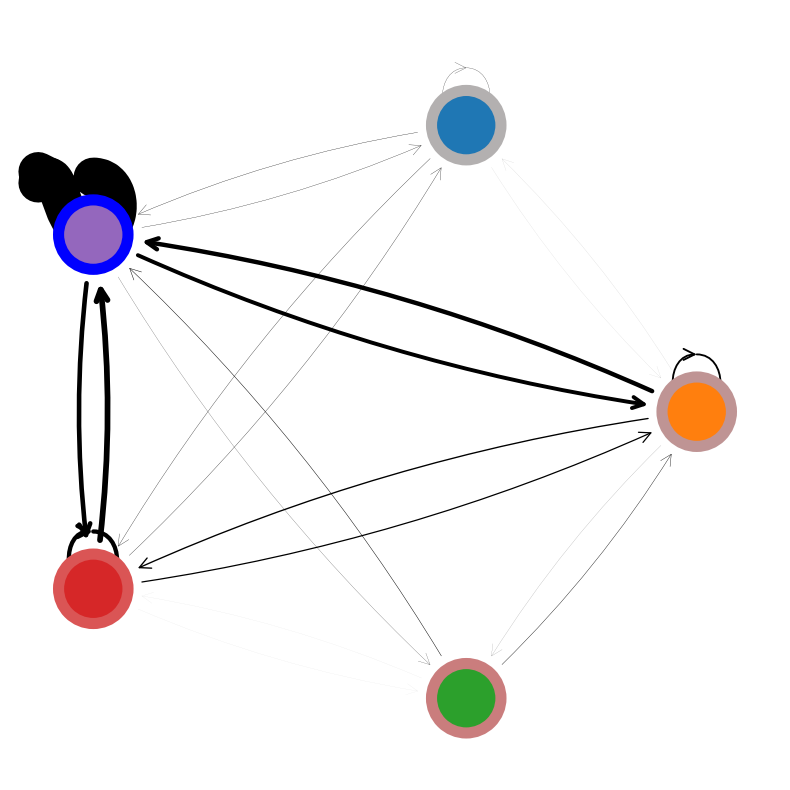

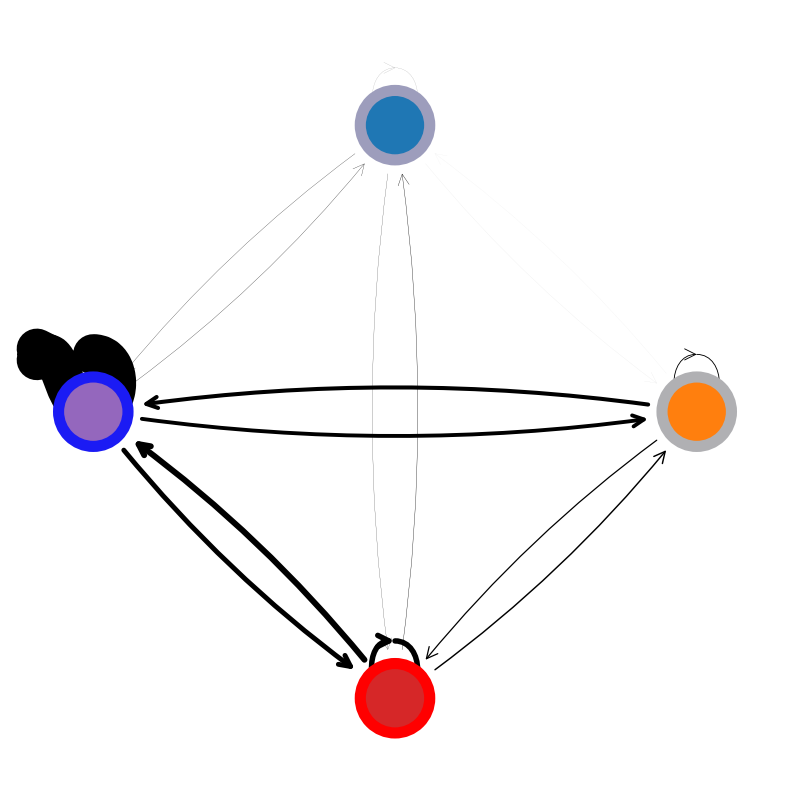

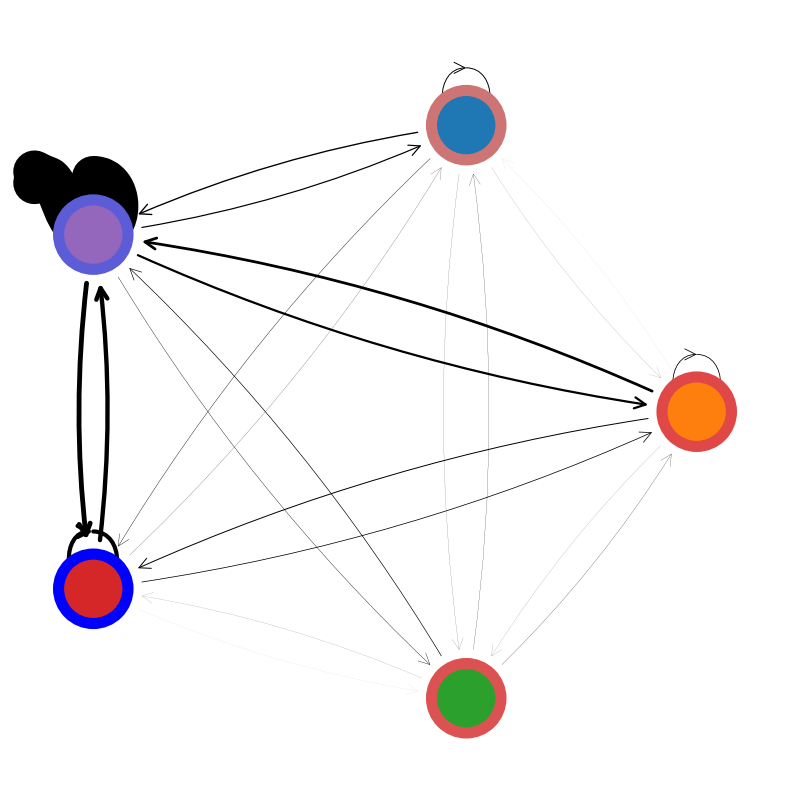

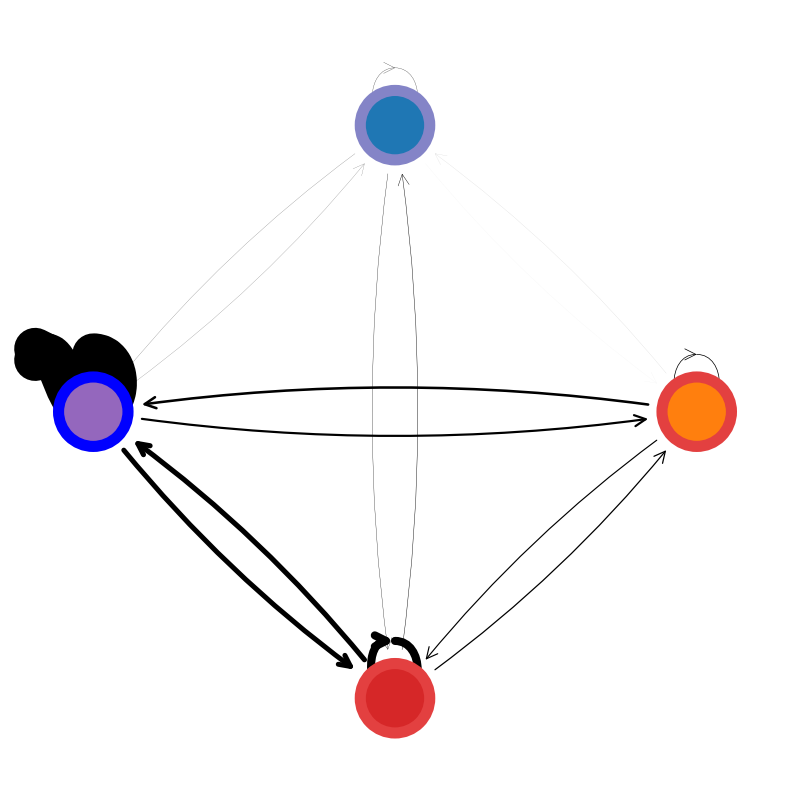

In [5]:
for sample in brain_aged_tech1_normalised:
    overall_sample = mmcci.it.calculate_overall_interactions(sample)
    mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

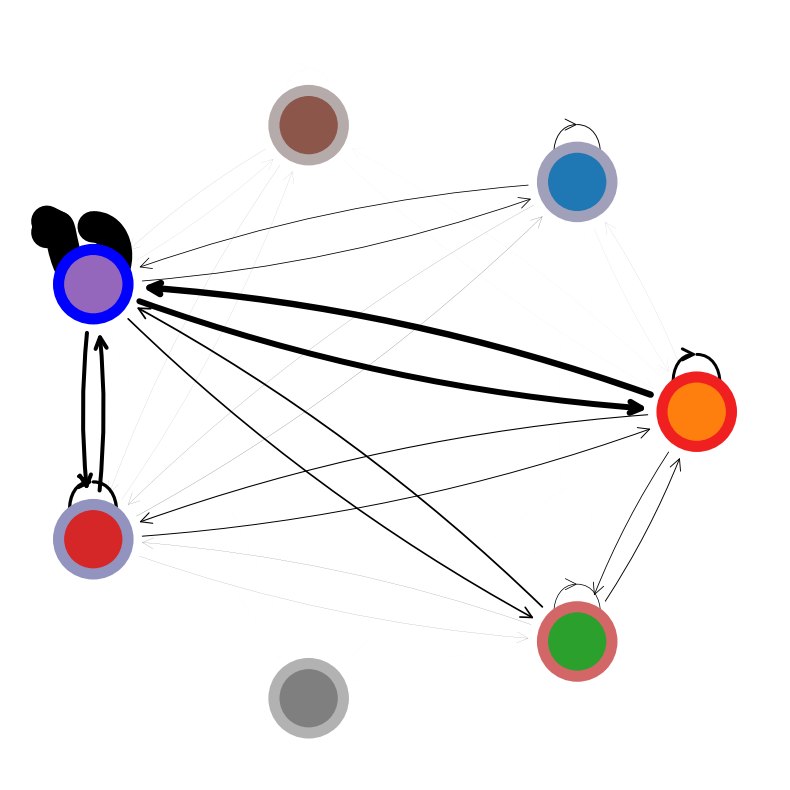

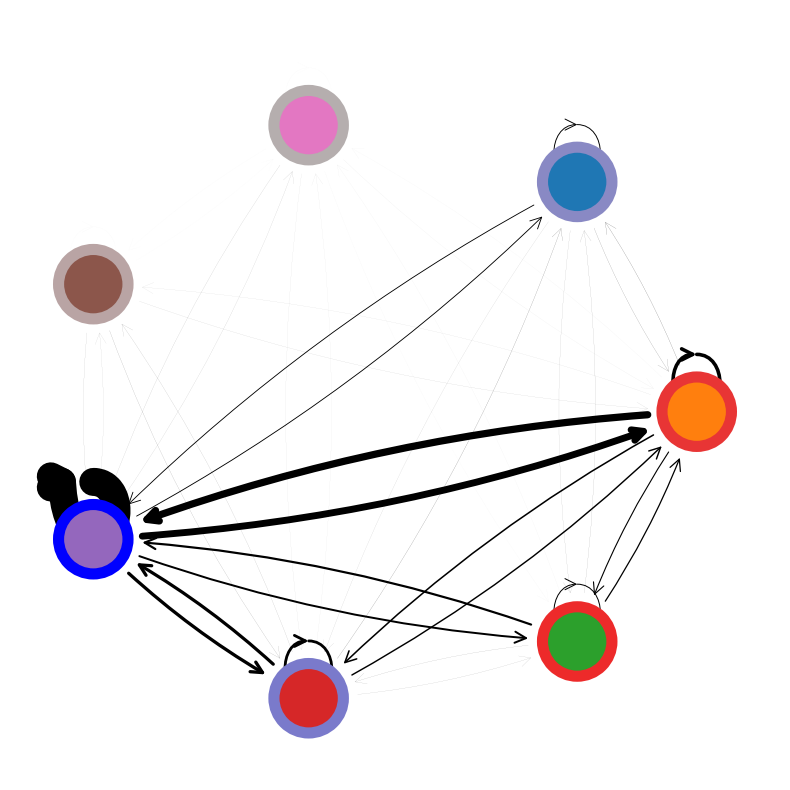

In [6]:
for sample in brain_aged_tech2_normalised:
    overall_sample = mmcci.it.calculate_overall_interactions(sample)
    # mmcci.plt.network_plot(overall_sample, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)
    mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

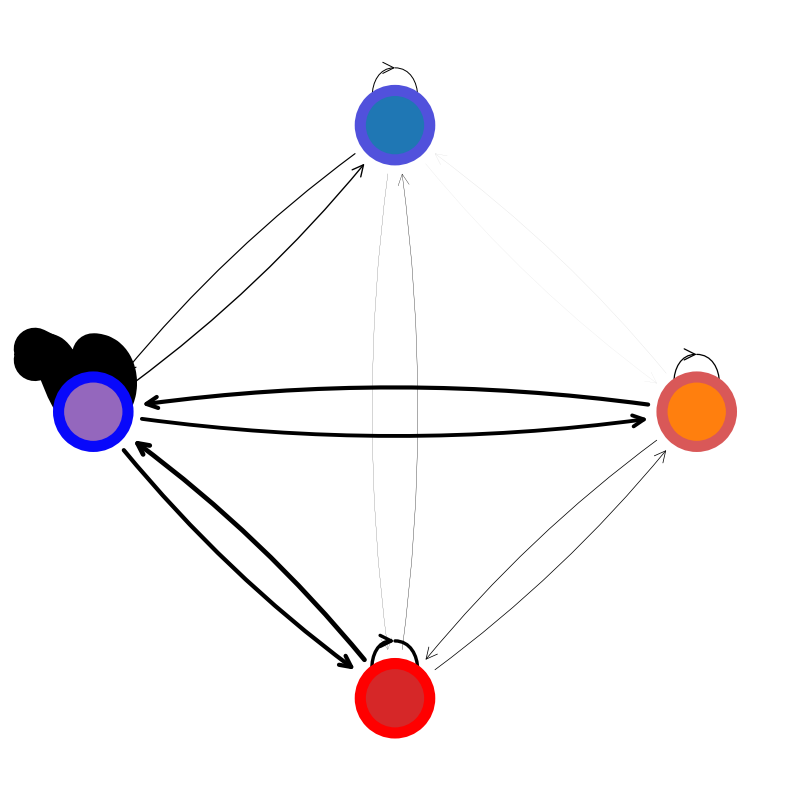

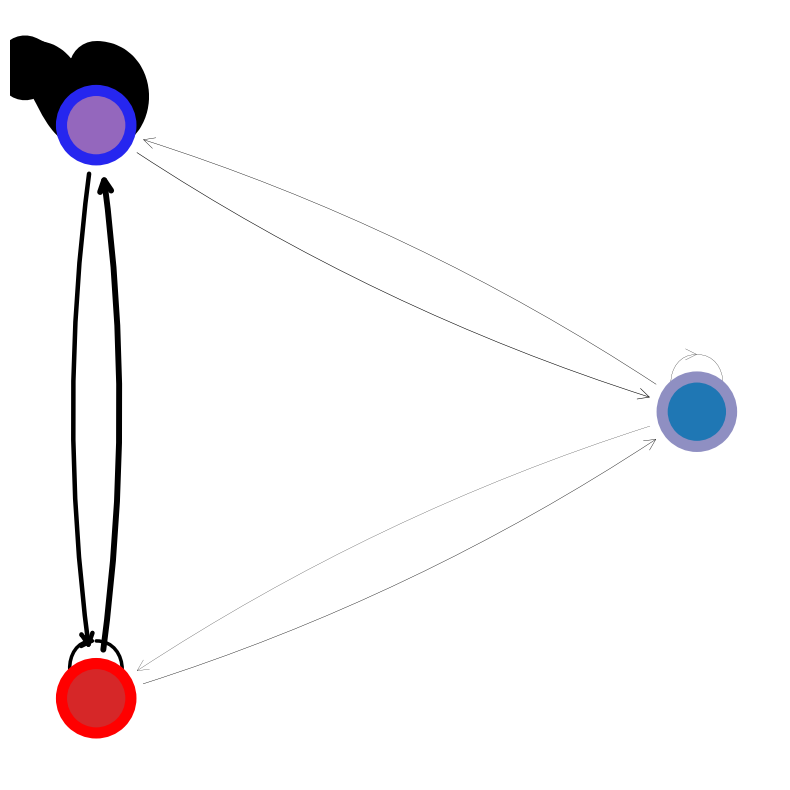

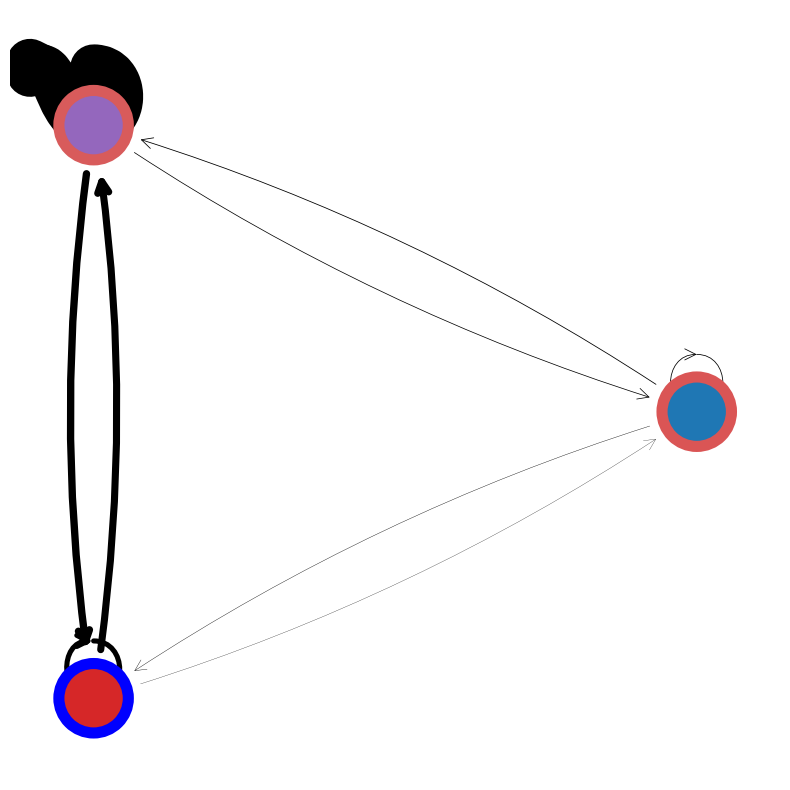

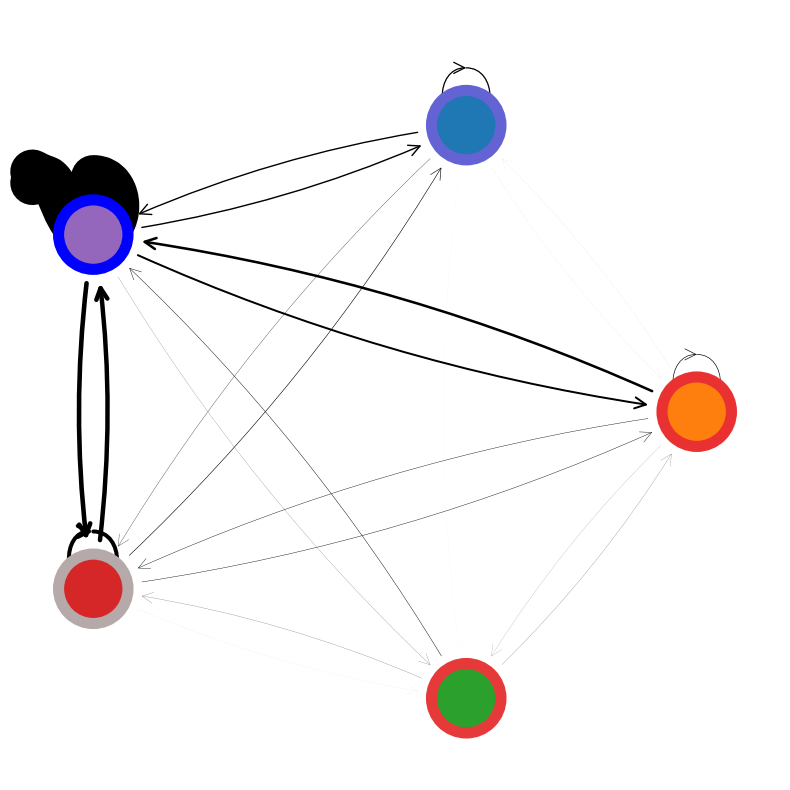

In [7]:
for sample in brain_young_tech1_normalised:
    overall_sample = mmcci.it.calculate_overall_interactions(sample)
    # mmcci.plt.network_plot(overall_sample, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)
    mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

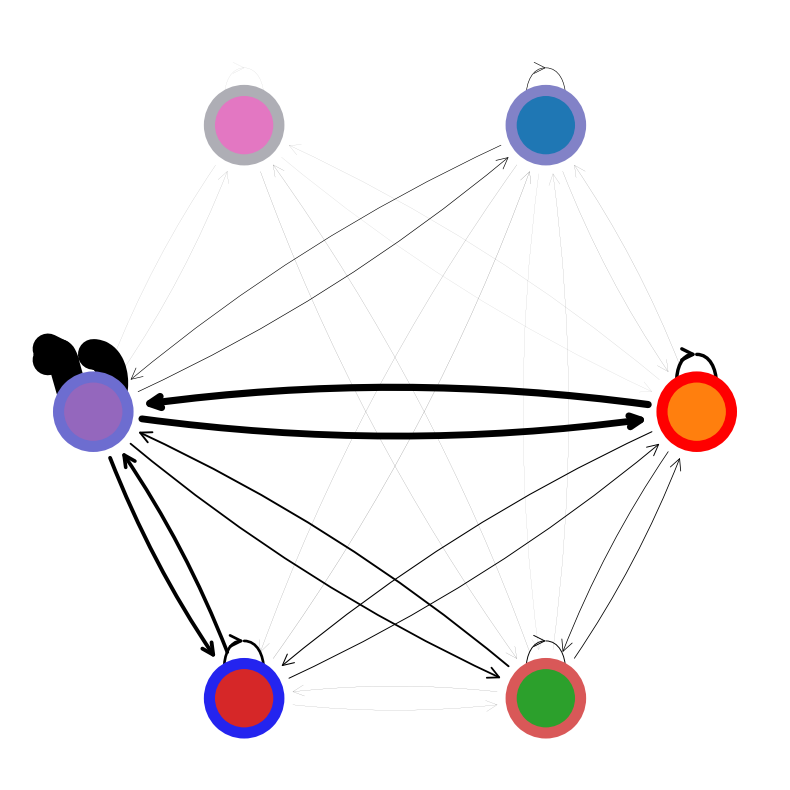

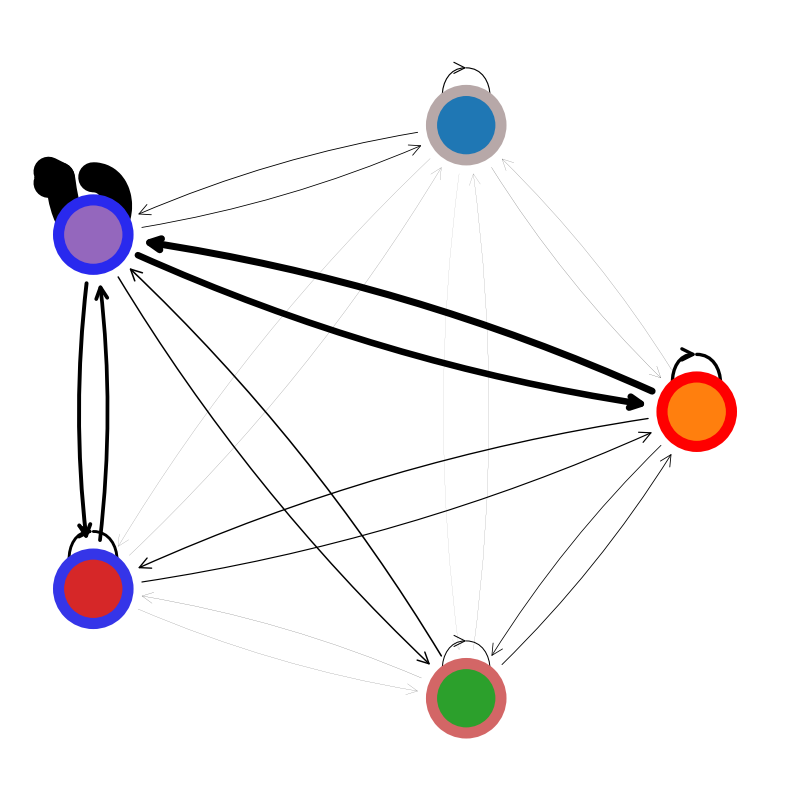

In [8]:
for sample in brain_young_tech2_normalised:
    overall_sample = mmcci.it.calculate_overall_interactions(sample)
    # mmcci.plt.network_plot(overall_sample, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)
    mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

#### Integrate within technologies

In [9]:
brain_aged_tech1_integrated = mmcci.it.integrate_samples(brain_aged_tech1_normalised, method=">50%")
brain_young_tech1_integrated = mmcci.it.integrate_samples(brain_young_tech1_normalised, method=">50%")
brain_aged_tech2_integrated = mmcci.it.integrate_samples(brain_aged_tech2_normalised, method=">50%")
brain_young_tech2_integrated = mmcci.it.integrate_samples(brain_young_tech2_normalised, method=">50%")

In [10]:
brain_aged_tech1_pvals = mmcci.it.integrate_p_vals(brain_data['brain_aged_tech1_pvals'])
brain_young_tech1_pvals = mmcci.it.integrate_p_vals(brain_data['brain_young_tech1_pvals'])
brain_aged_tech2_pvals = mmcci.it.integrate_p_vals(brain_data['brain_aged_tech2_pvals'])
brain_young_tech2_pvals = mmcci.it.integrate_p_vals(brain_data['brain_young_tech2_pvals'])

In [11]:
brain_aged_tech1_integrated_filtered = mmcci.it.remove_insignificant(brain_aged_tech1_integrated, brain_aged_tech1_pvals)
brain_young_tech1_integrated_filtered = mmcci.it.remove_insignificant(brain_young_tech1_integrated, brain_young_tech1_pvals)
brain_aged_tech2_integrated_filtered = mmcci.it.remove_insignificant(brain_aged_tech2_integrated, brain_aged_tech2_pvals)
brain_young_tech2_integrated_filtered = mmcci.it.remove_insignificant(brain_young_tech2_integrated, brain_young_tech2_pvals)

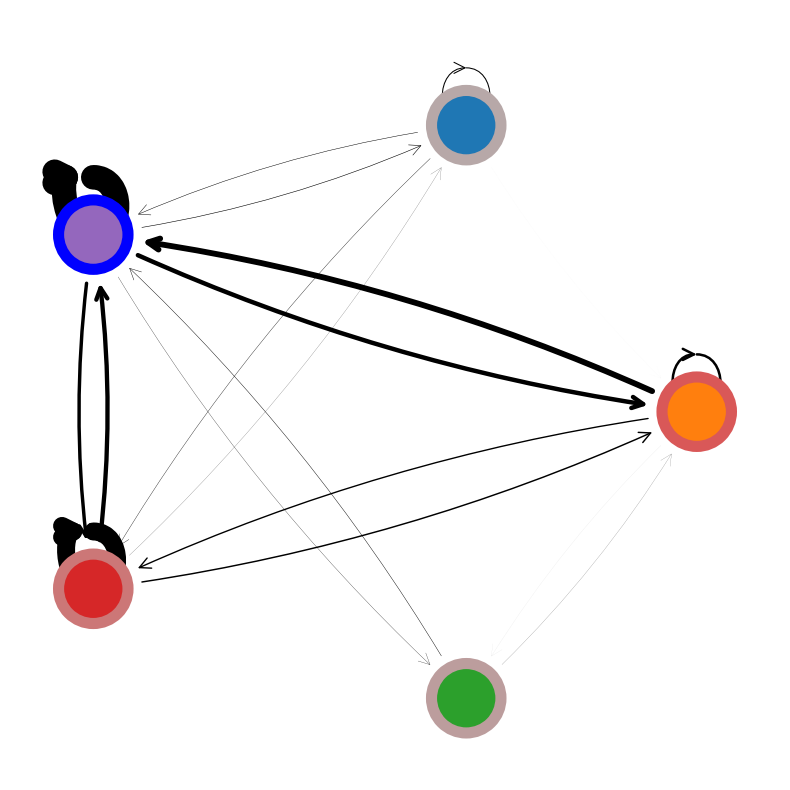

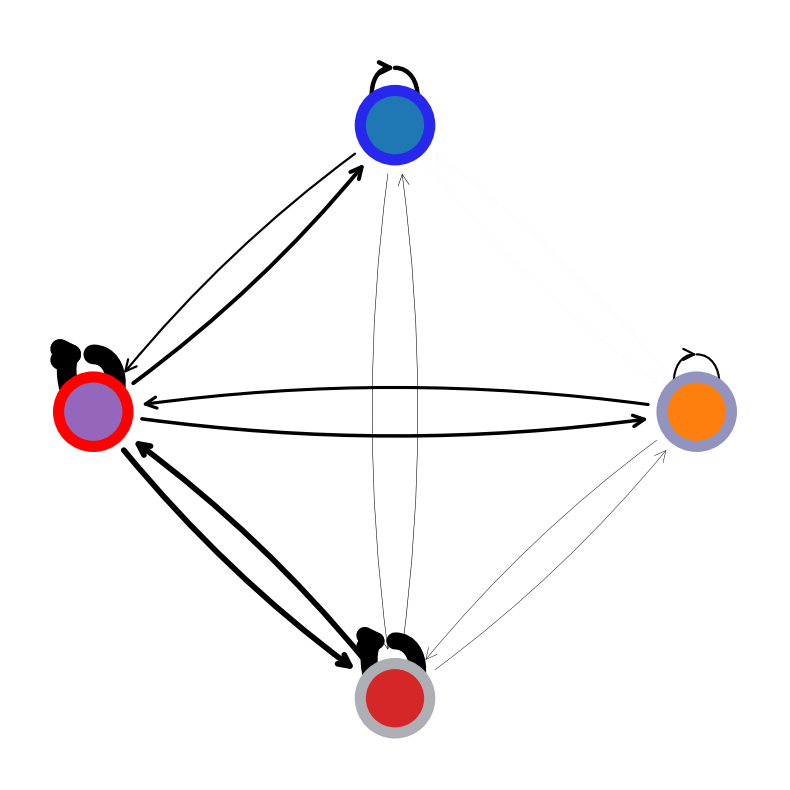

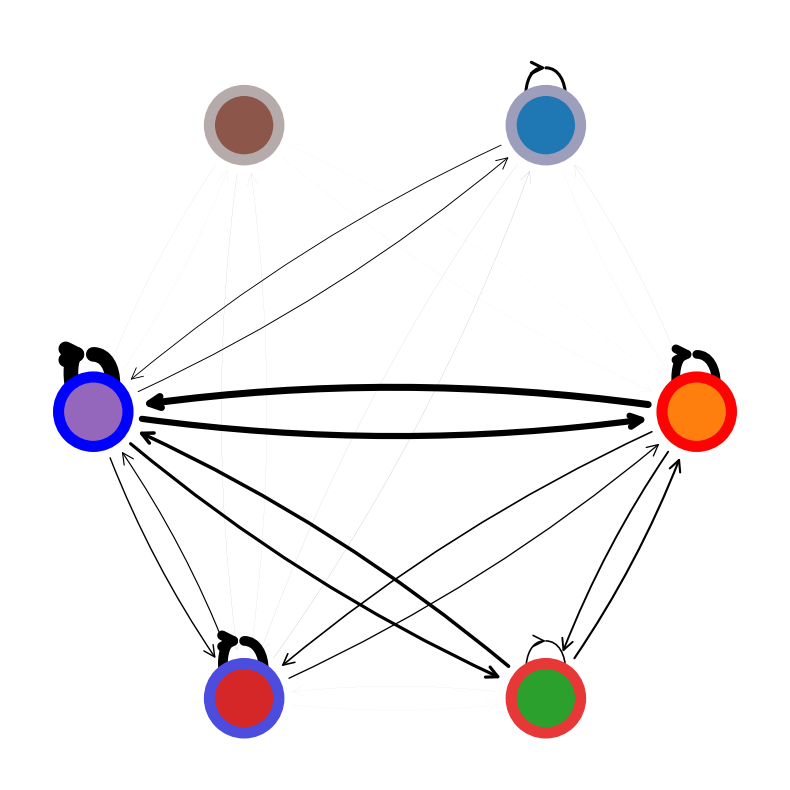

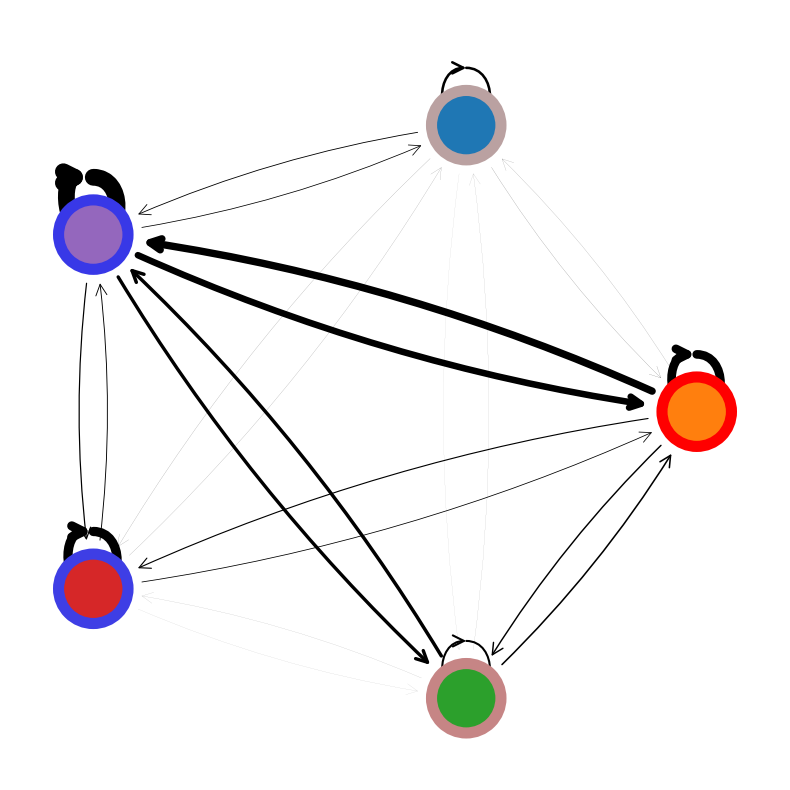

In [12]:
overall_sample = mmcci.it.calculate_overall_interactions(brain_aged_tech1_integrated_filtered)
mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
overall_sample = mmcci.it.calculate_overall_interactions(brain_young_tech1_integrated_filtered)
mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
overall_sample = mmcci.it.calculate_overall_interactions(brain_aged_tech2_integrated_filtered)
mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
overall_sample = mmcci.it.calculate_overall_interactions(brain_young_tech2_integrated_filtered)
mmcci.plt.network_plot(overall_sample, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

#### Normalise samples between technologies

In [13]:
aged_normalised = mmcci.it.normalise_between_tech([brain_aged_tech1_integrated, brain_aged_tech2_integrated])
young_normalised = mmcci.it.normalise_between_tech([brain_young_tech1_integrated, brain_young_tech2_integrated])

#### Integrate between technologies for both groups

In [14]:
aged_integrated = mmcci.it.integrate_samples(aged_normalised, method=">=50%")
young_integrated = mmcci.it.integrate_samples(young_normalised, method=">=50%")

In [15]:
aged_pvals = mmcci.it.integrate_p_vals(brain_data['brain_aged_tech1_pvals'] + brain_data['brain_aged_tech2_pvals'])
young_pvals = mmcci.it.integrate_p_vals(brain_data['brain_young_tech1_pvals'] + brain_data['brain_young_tech2_pvals'])

In [16]:
aged_integrated_filtered = mmcci.it.remove_insignificant(aged_integrated, aged_pvals)
young_integrated_filtered = mmcci.it.remove_insignificant(young_integrated, young_pvals)

#### Calculate overall interactions network per group

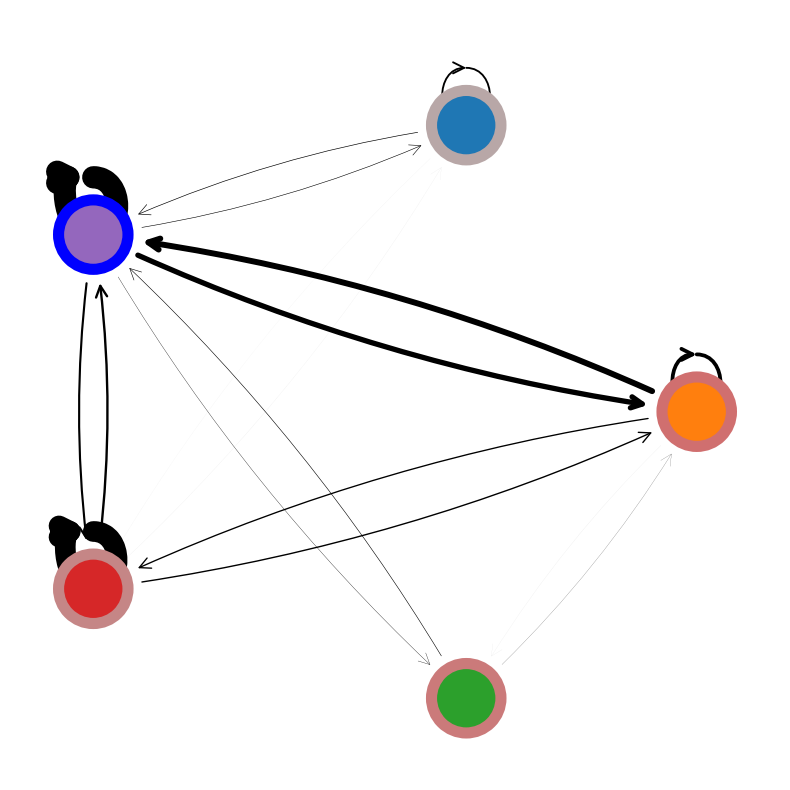

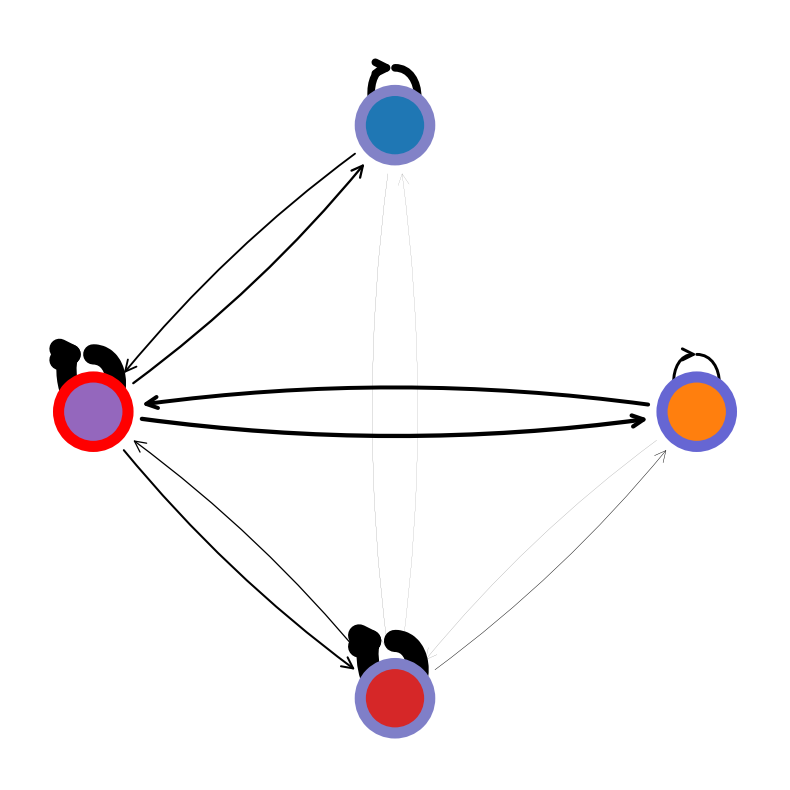

In [17]:
aged_overall = mmcci.it.calculate_overall_interactions(aged_integrated_filtered)
young_overall = mmcci.it.calculate_overall_interactions(young_integrated_filtered)

mmcci.plt.network_plot(aged_overall, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
mmcci.plt.network_plot(young_overall, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

#### Rank LR pairs based on dissimilarity between groups

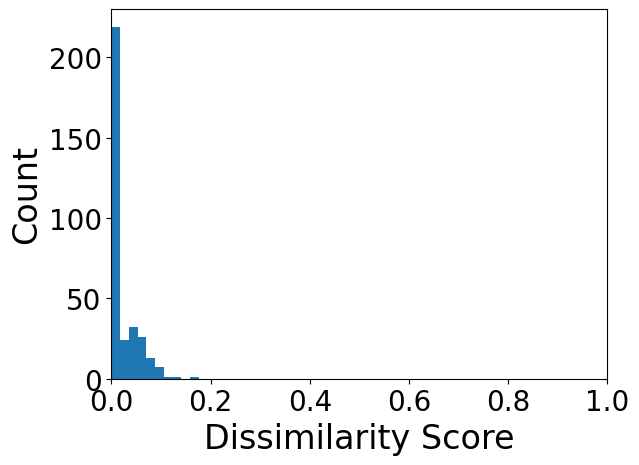

Overall Network Aged vs Young Dissimilarity Score is: 0.21338105339856273


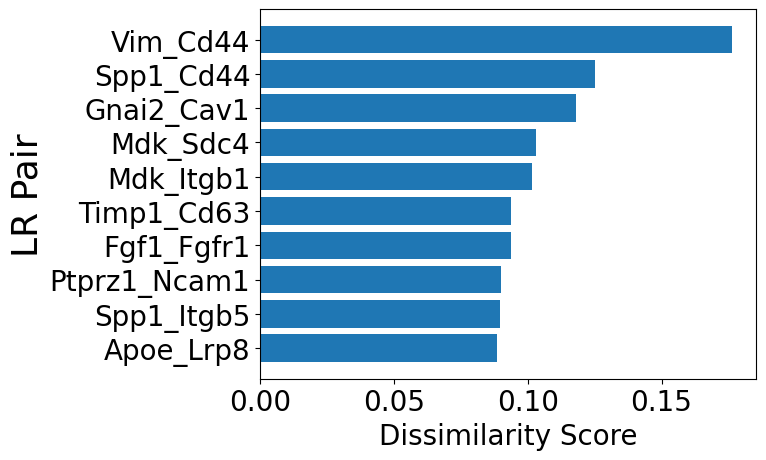

In [18]:
dissimilarity_scores = mmcci.an.calculate_dissim(aged_integrated_filtered, young_integrated_filtered)
mmcci.plt.dissim_hist(dissimilarity_scores)
    
## Sort LR Pairs from high to low dissimilarities
print("Overall Network Aged vs Young Dissimilarity Score is: " + str(mmcci.sc.dissimilarity_score(aged_overall, young_overall)))

mmcci.plt.lr_top_dissimilarity(dissimilarity_scores, x_label_size=20, y_label_size=26)

#### Plot highly dissimilar pairs between groups

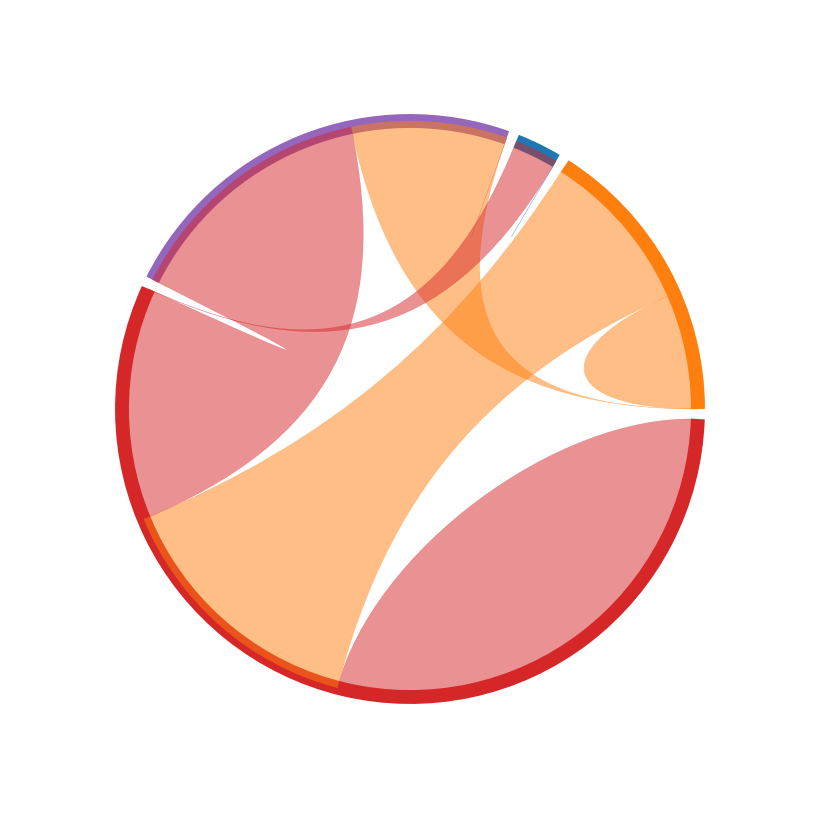

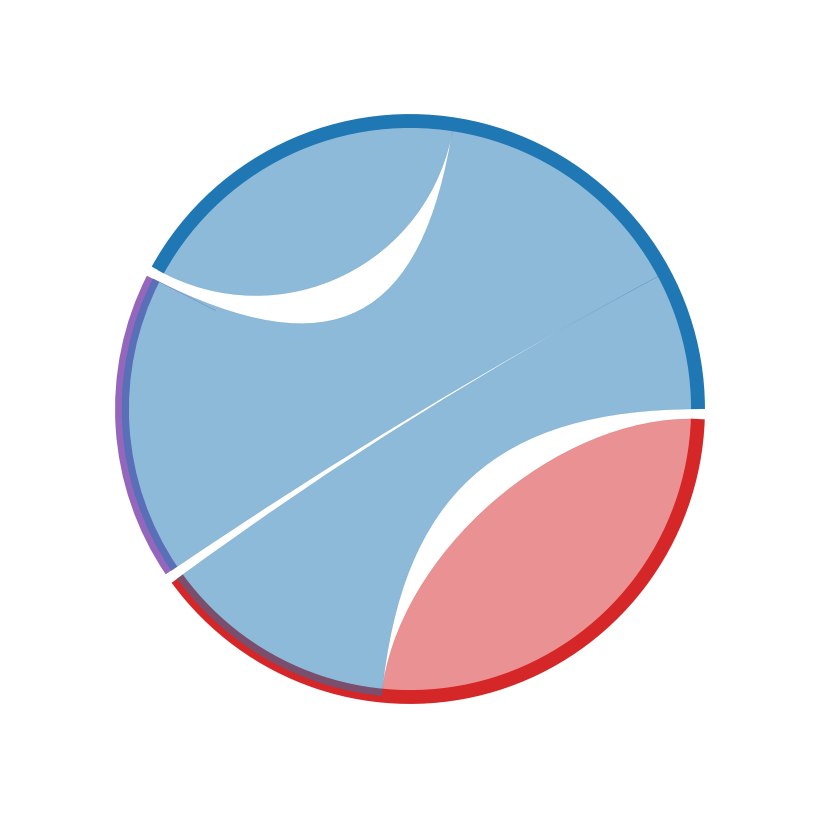

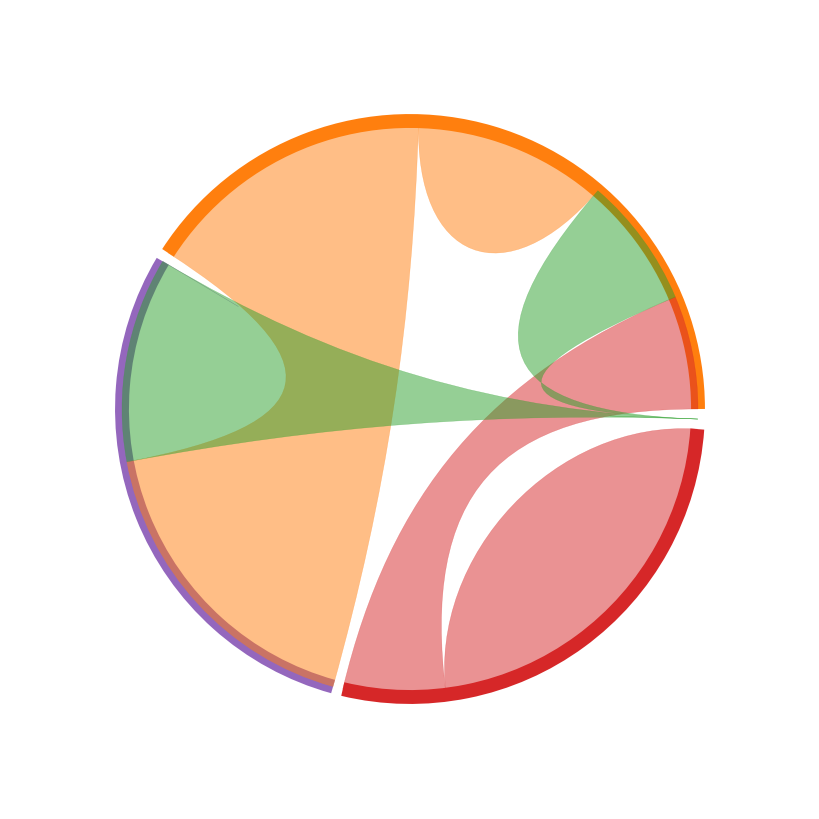

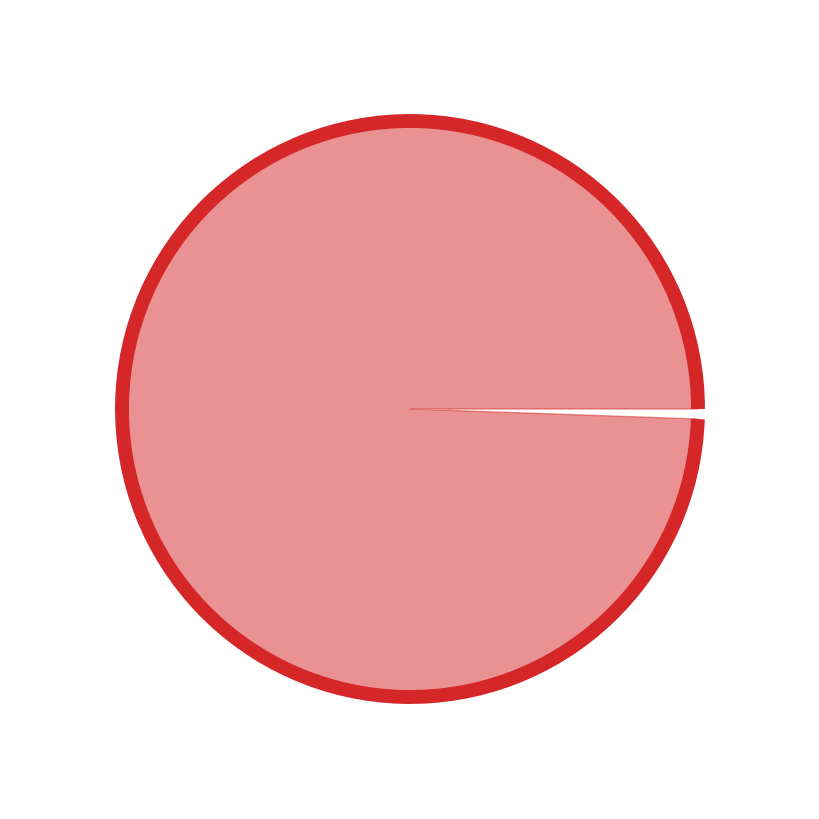

In [19]:
mmcci.plt.chord_plot(aged_integrated_filtered['Vim_Cd44'], colors=colors, label_size=0)
mmcci.plt.chord_plot(young_integrated_filtered['Vim_Cd44'], colors=colors, label_size=0)

mmcci.plt.chord_plot(aged_integrated_filtered['Gnai2_Cav1'], colors=colors, label_size=0)
mmcci.plt.chord_plot(young_integrated_filtered['Gnai2_Cav1'], colors=colors, label_size=0)

#### Calculate p values for significance changes between groups

In [20]:
p_values = mmcci.an.perm_test(aged_overall, young_overall)
p_values

Astrocytes  Ependymal   Immune  Microglia  Neurons   Oligos  \
Astrocytes         0.15606    0.28035  0.28231    0.28153  0.03169  0.07739   
Ependymal          0.28226    0.00000  0.28234    0.28020  0.09279  0.23583   
Immune             0.27976    0.27958  0.28431    0.28166  0.28353  0.28114   
Microglia          0.28378    0.28139  0.28175    0.27965  0.27868  0.27869   
Neurons            0.12524    0.04692  0.27950    0.28034  0.01520  0.21884   
Oligos             0.13966    0.25128  0.28350    0.28055  0.10908  0.06320   
PeripheralGlia     0.28220    0.28075  0.28198    0.28466  0.27998  0.28260   
Vascular           0.20544    0.28051  0.28272    0.27987  0.17228  0.28134   

                PeripheralGlia  Vascular  
Astrocytes             0.27798   0.26484  
Ependymal              0.28171   0.28143  
Immune                 0.28233   0.28144  
Microglia              0.28089   0.28214  
Neurons                0.28016   0.18721  
Oligos                 0.28097   0.27932  
PeripheralGlia         0.27911   0.27867  
Vascular               0.27912   0.28074

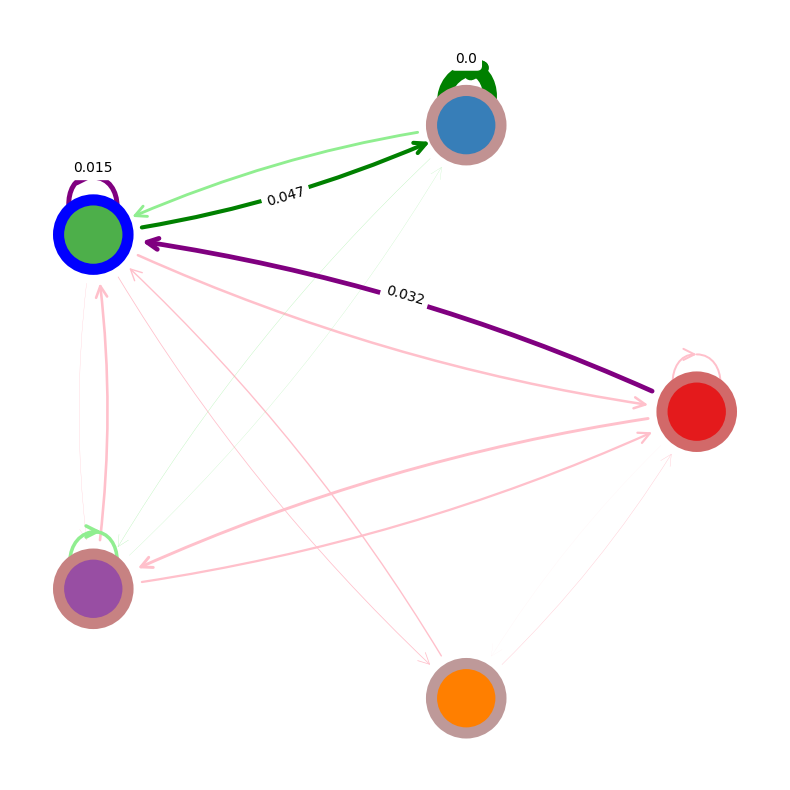

In [21]:
age_diff = mmcci.an.get_network_diff(aged_overall, young_overall)
mmcci.plt.network_plot(age_diff, p_values, diff_plot=True, show_labels=False, node_size=2500, edge_weight=120, figsize=(8,8))

#### Get LR pairs from Astrocytes to Neurons

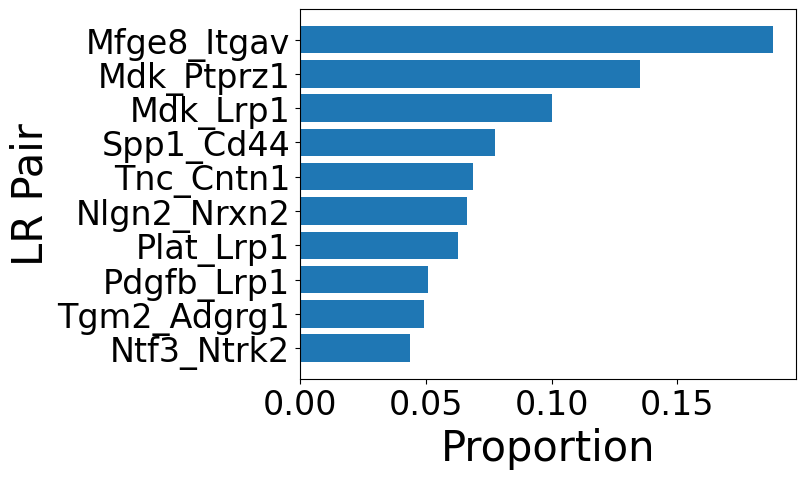

In [22]:
mmcci.plt.lrs_per_celltype(young_integrated_filtered, "Astrocytes", "Neurons", n=10, x_label_size=30, y_label_size=30, tick_size=24)

In [23]:
len(mmcci.an.get_lrs_per_celltype(young_integrated_filtered, "Astrocytes", "Neurons"))

15

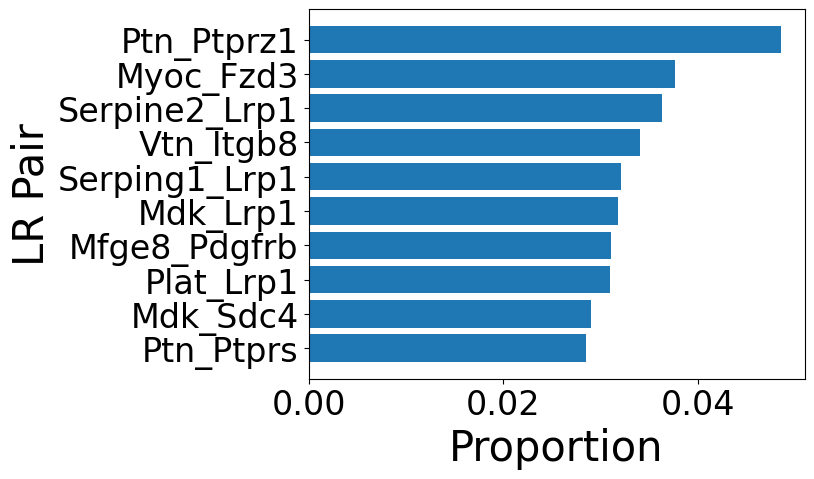

In [24]:
mmcci.plt.lrs_per_celltype(aged_integrated_filtered, "Astrocytes", "Neurons", n=10, x_label_size=30, y_label_size=30, tick_size=24)

In [25]:
len(mmcci.an.get_lrs_per_celltype(aged_integrated_filtered, "Astrocytes", "Neurons"))

59

#### Cluster Aged and Young LR Pairs

In [30]:
aged_clusters = mmcci.an.lr_grouping(aged_integrated_filtered, n_clusters=0)
aged_integrated_clusters = mmcci.an.subset_clusters(aged_integrated_filtered, aged_clusters)
aged_overall_clusters = mmcci.an.calculate_cluster_interactions(aged_integrated_clusters)

Computing Dissimilarity Scores for multiple interactions...


Processing:   0%|          | 0/149 [00:00<?, ?it/s]

Processing: 100%|██████████| 149/149 [00:07<00:00, 19.30it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...
Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 156/156 [00:08<00:00, 18.03it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...



cluster0: Contains 26 LR pairs


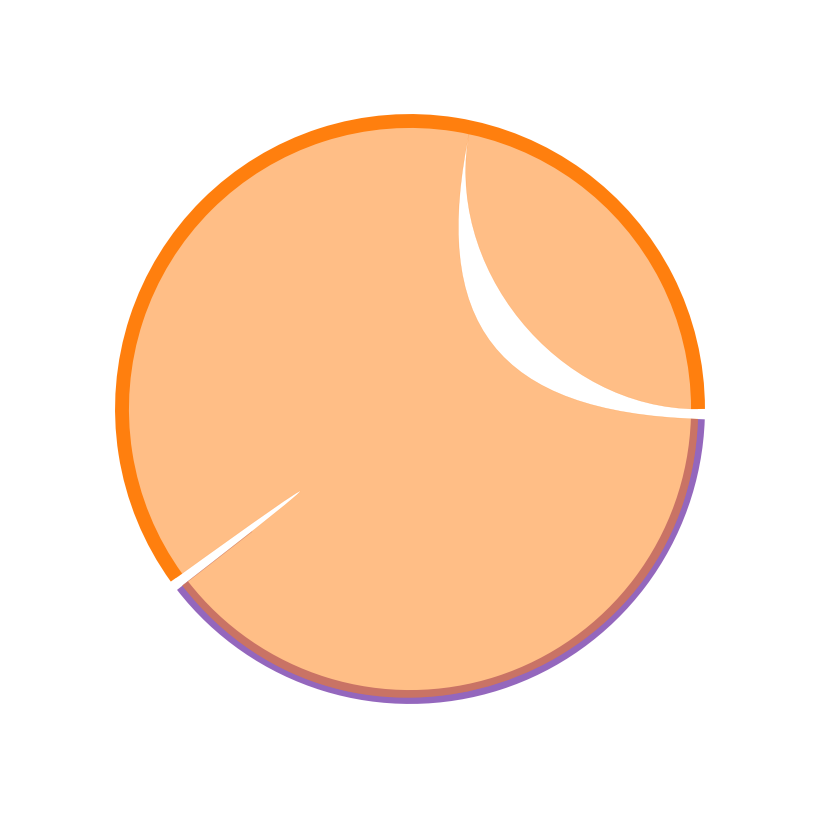


cluster1: Contains 21 LR pairs


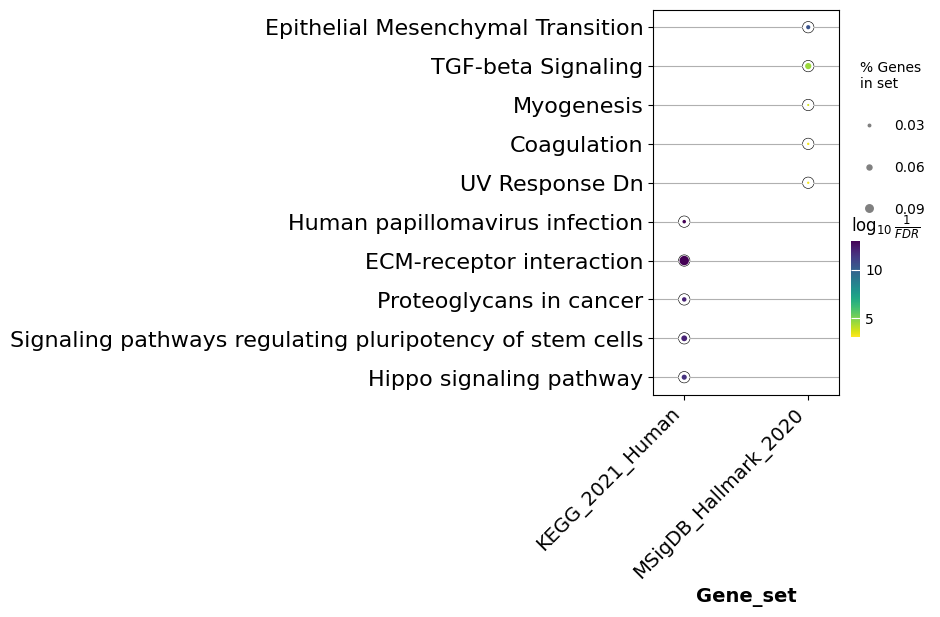

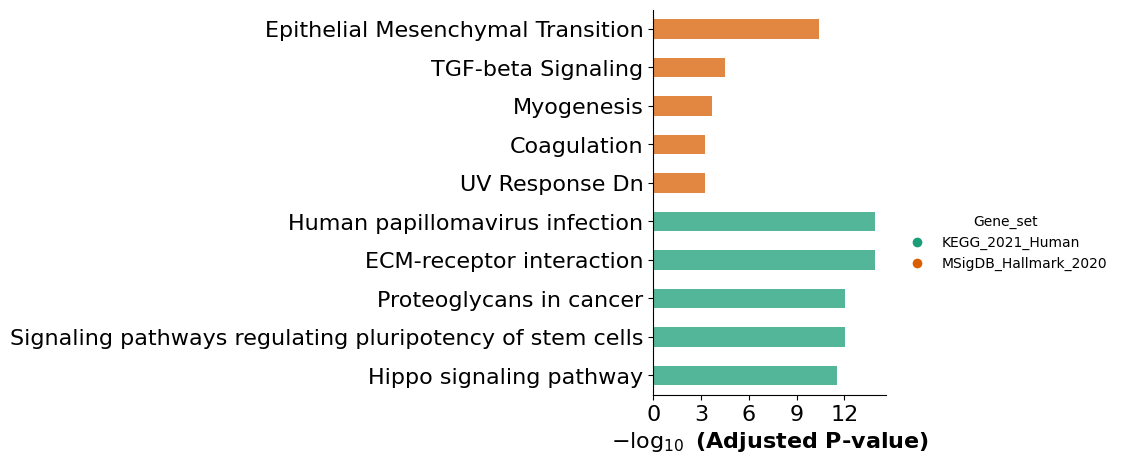

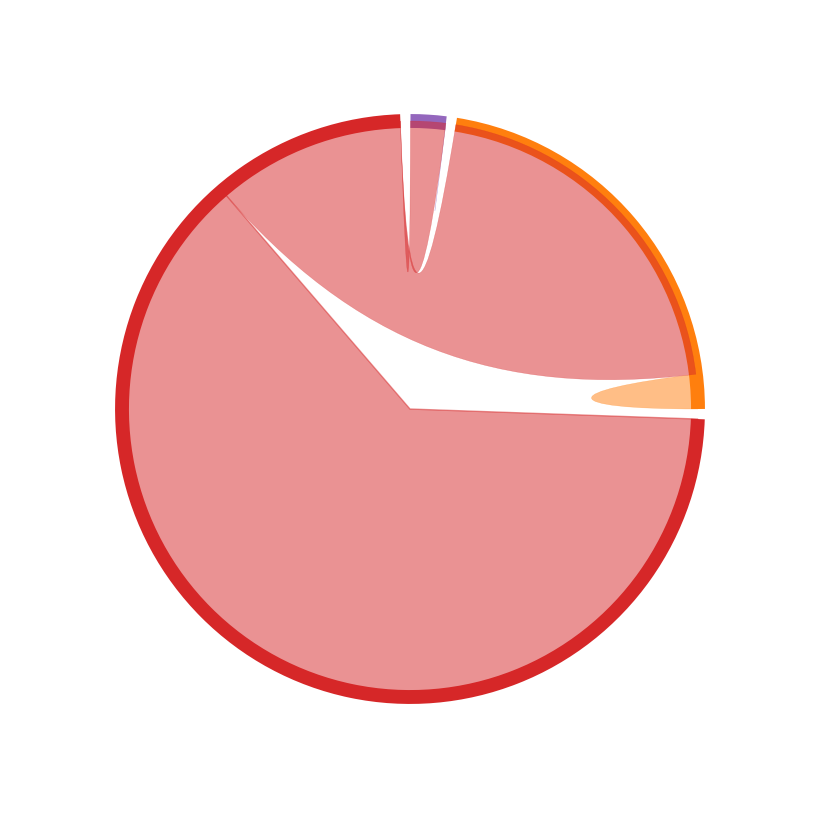


cluster2: Contains 15 LR pairs


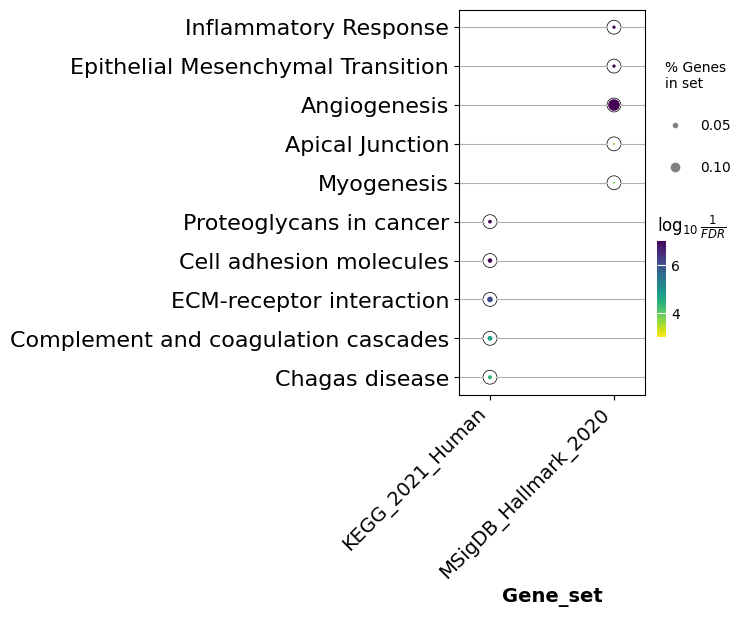

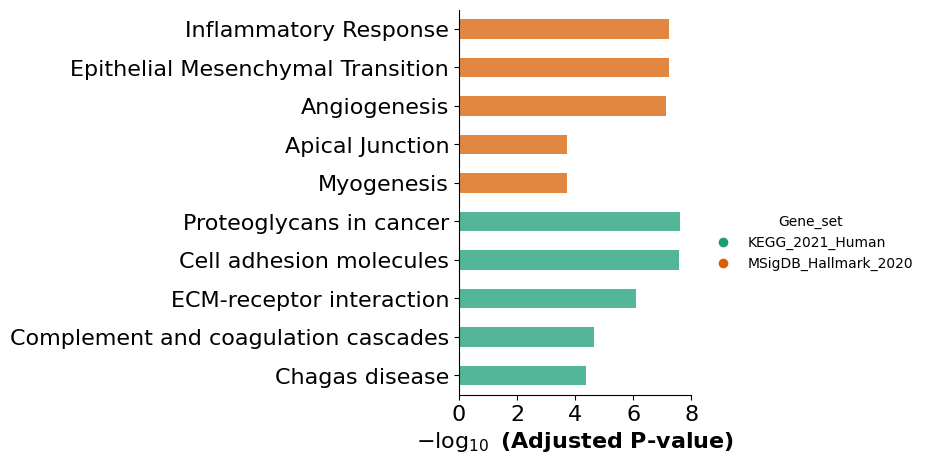

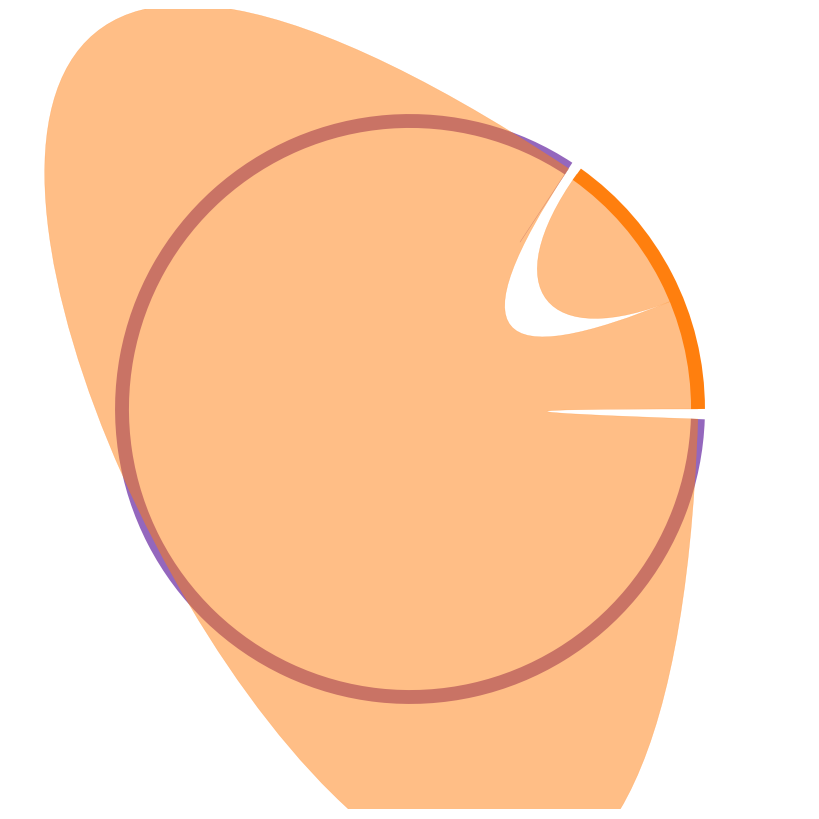


cluster3: Contains 39 LR pairs


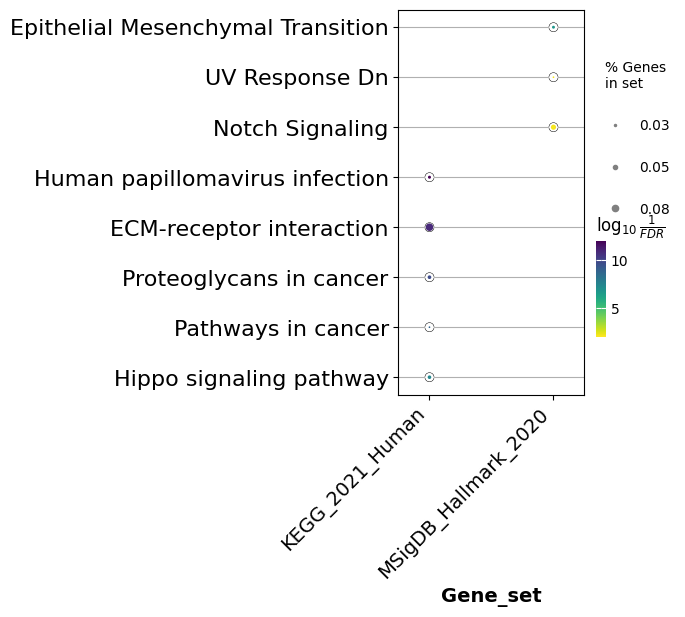

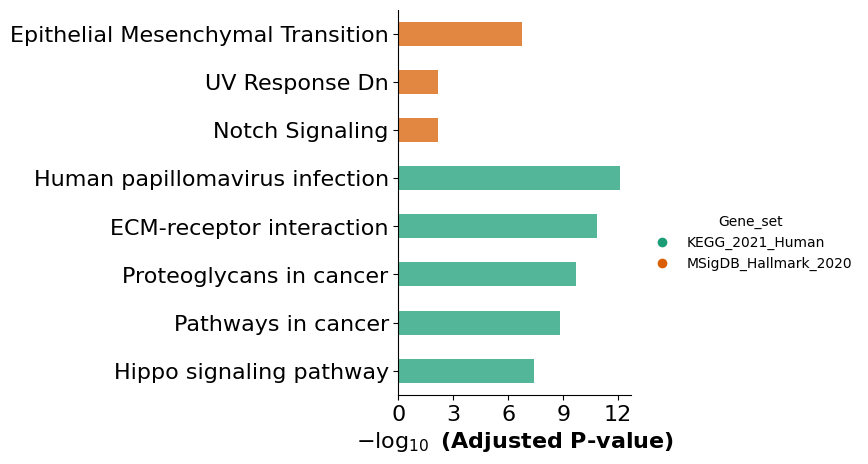

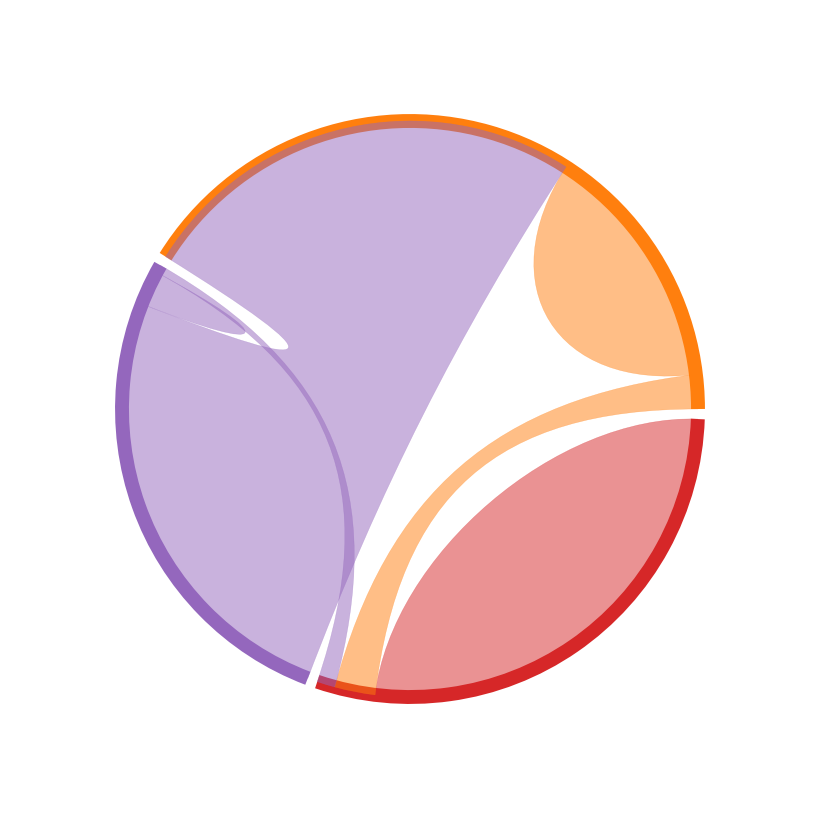


cluster4: Contains 39 LR pairs


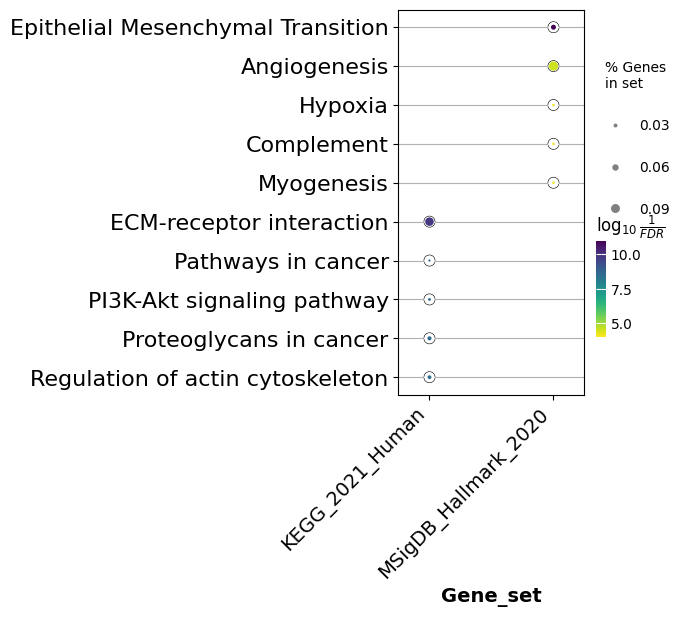

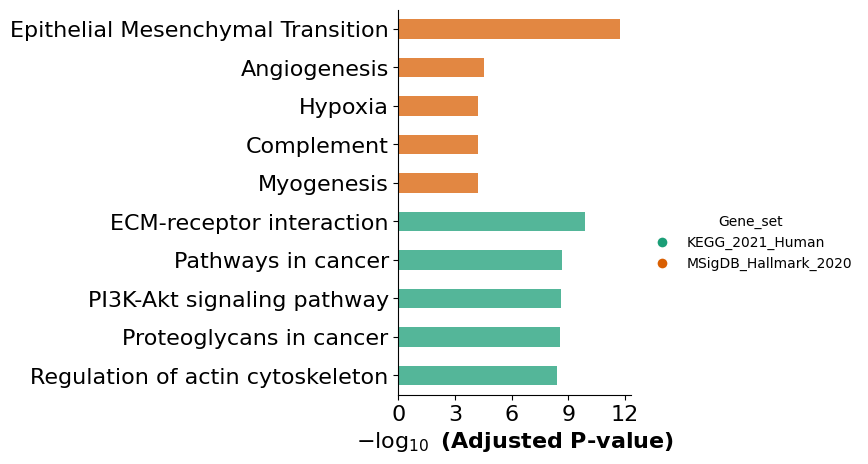

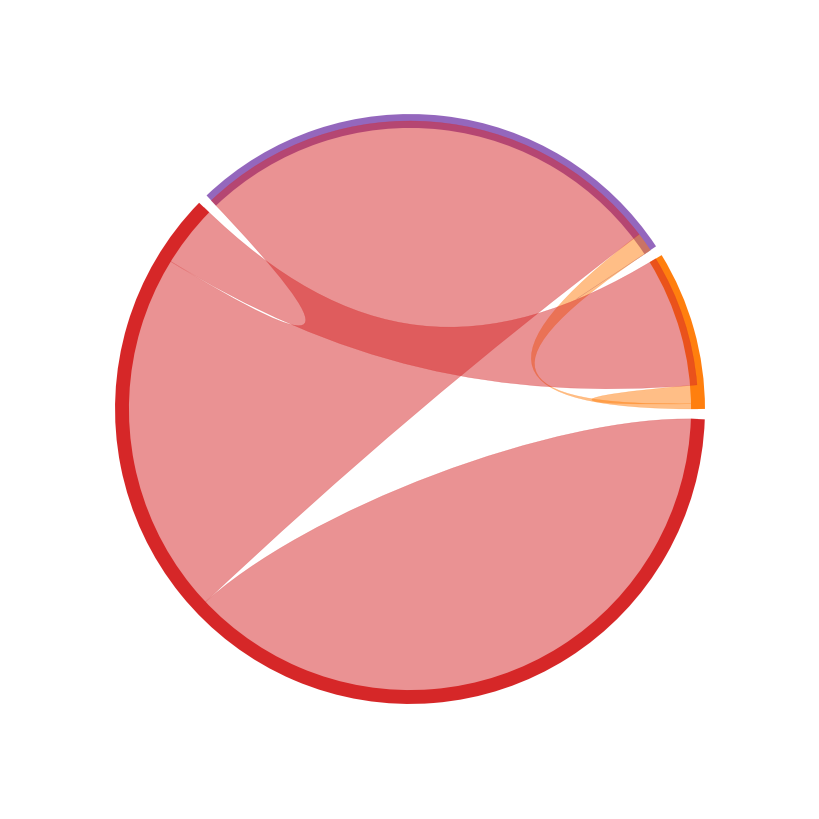


cluster5: Contains 15 LR pairs


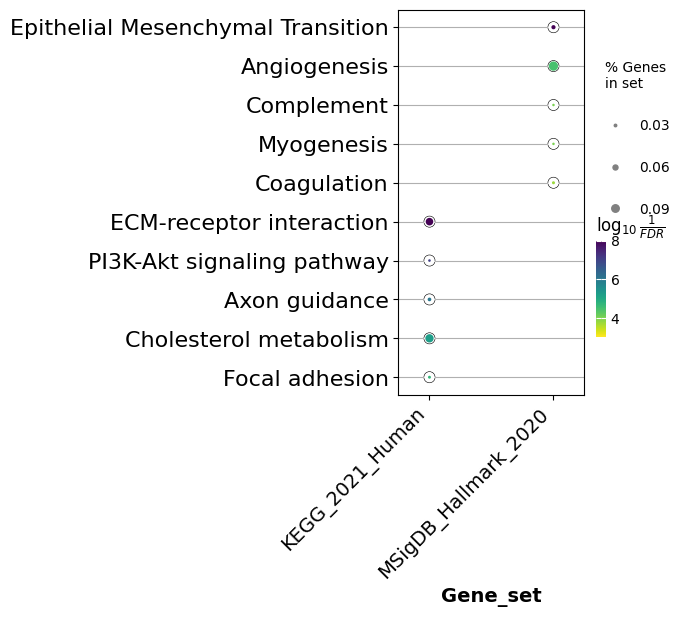

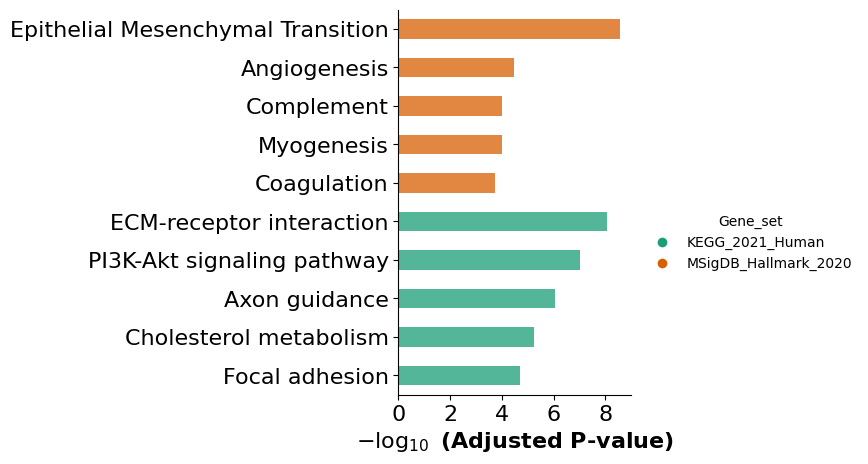

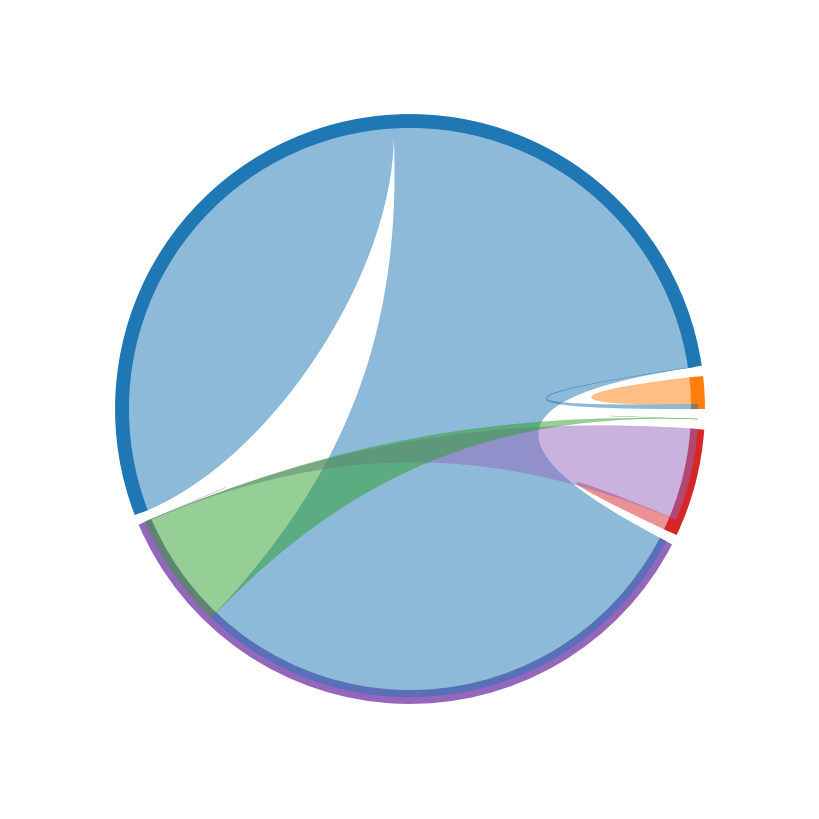


cluster6: Contains 17 LR pairs


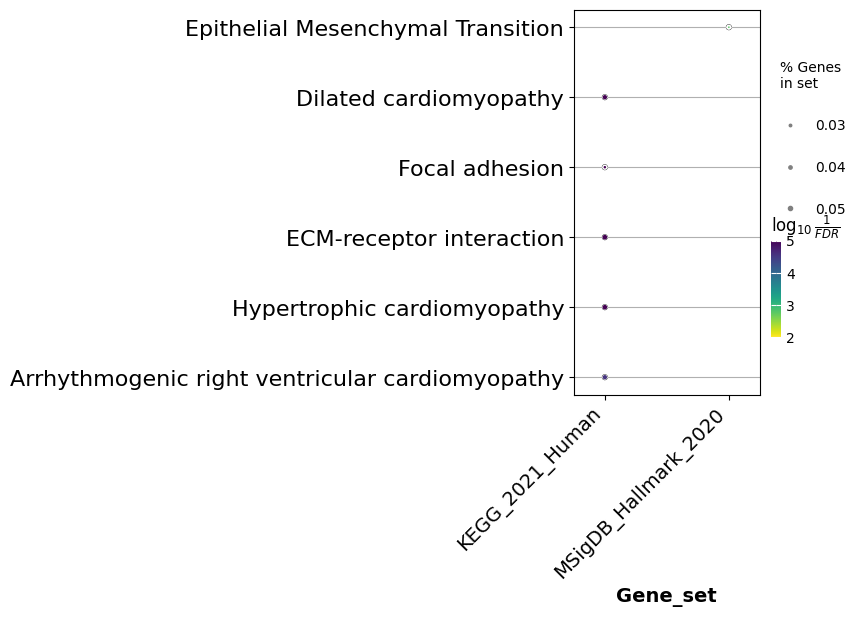

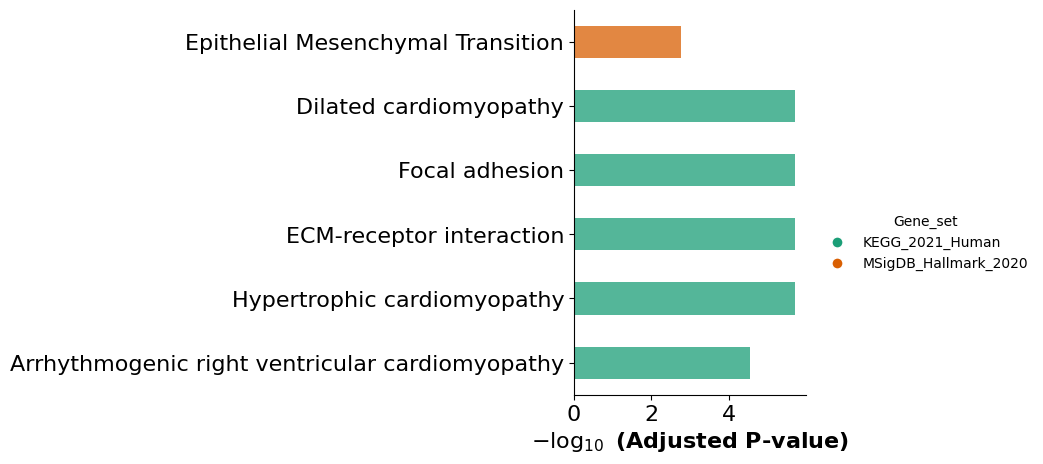

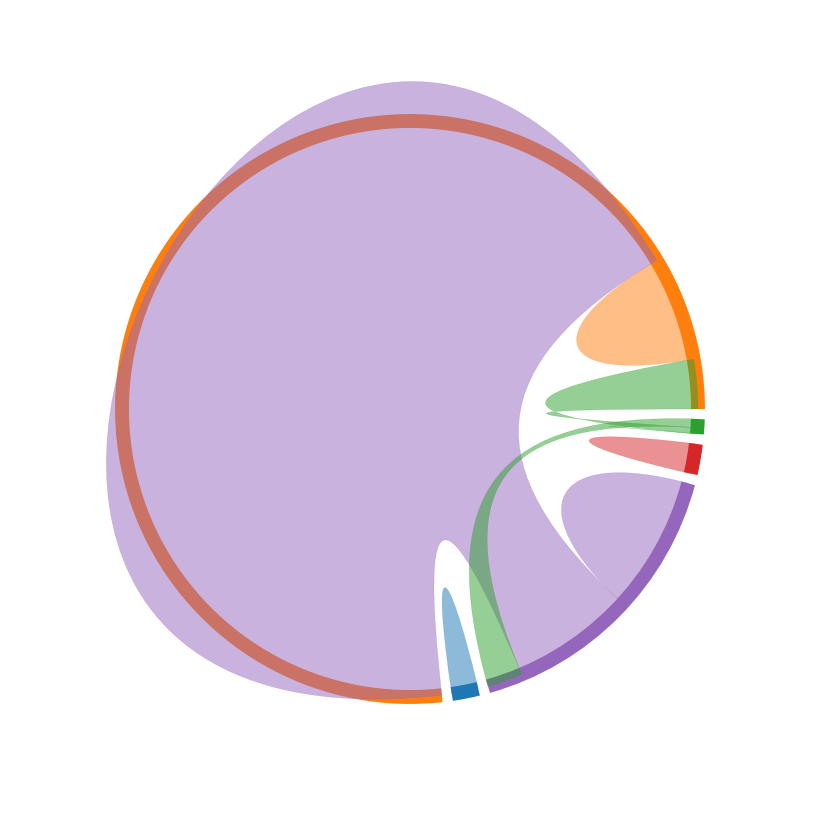


cluster7: Contains 36 LR pairs


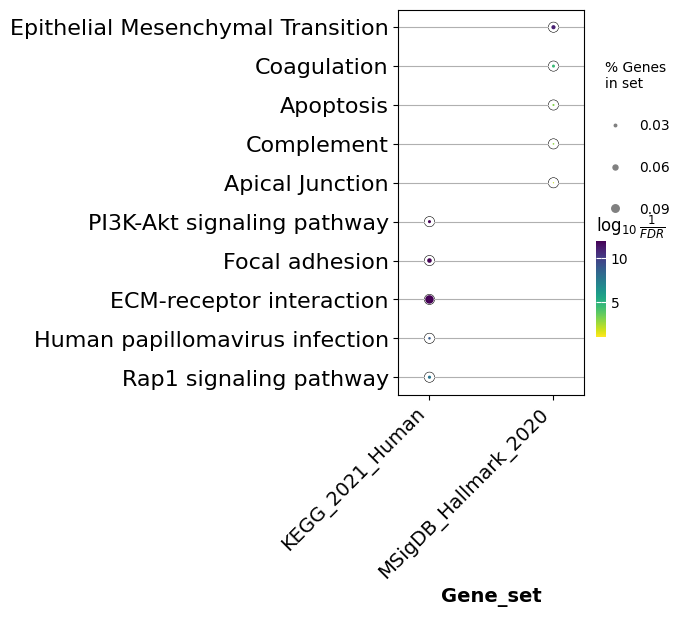

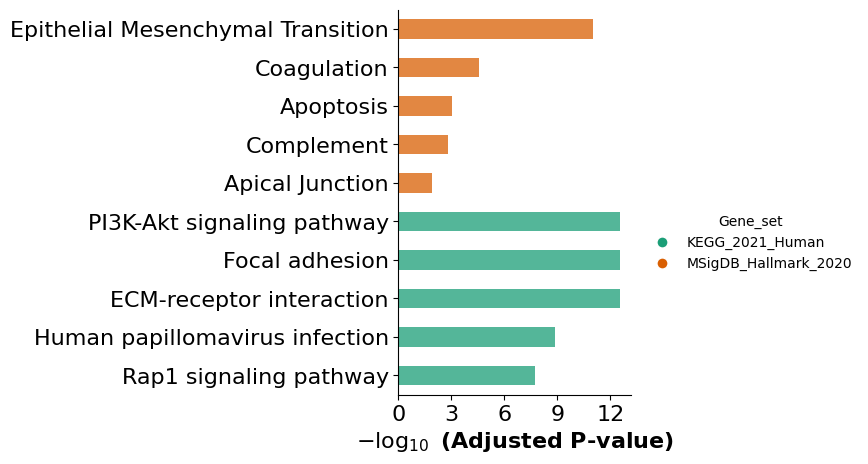

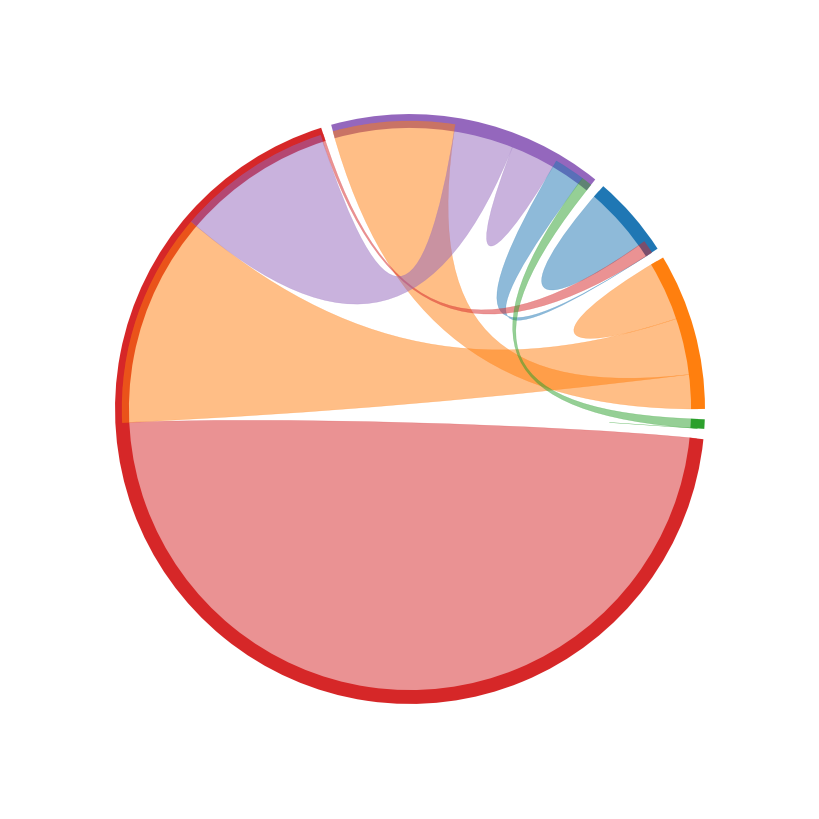


cluster8: Contains 26 LR pairs


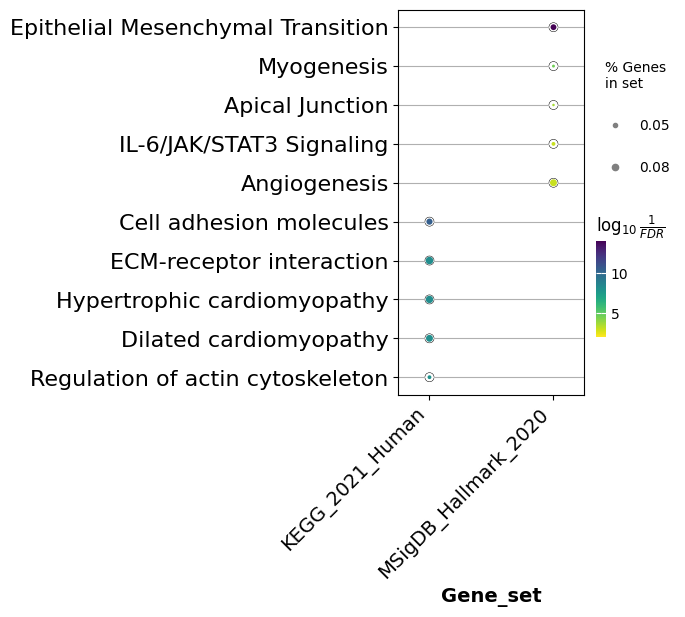

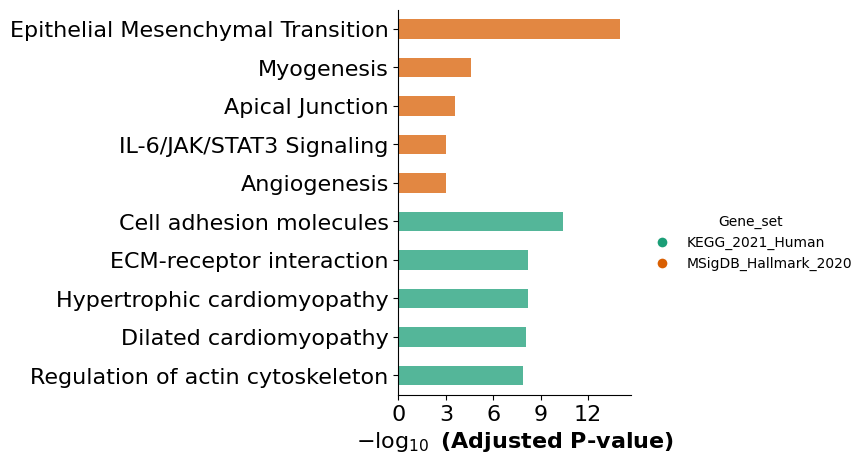

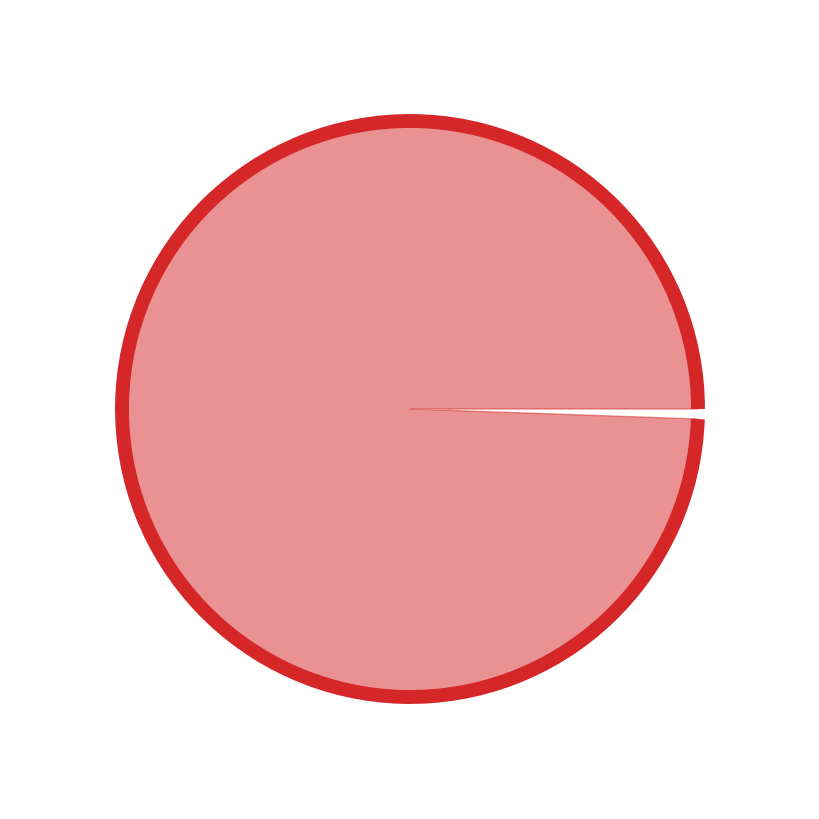


cluster9: Contains 95 LR pairs


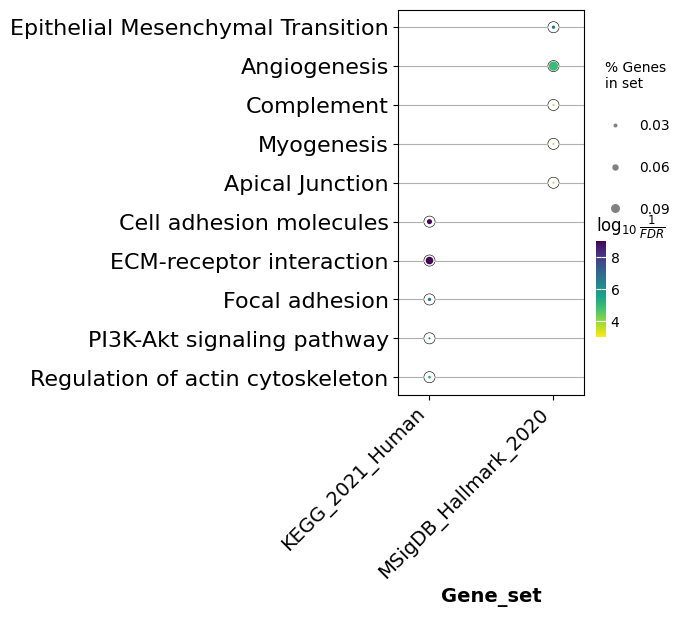

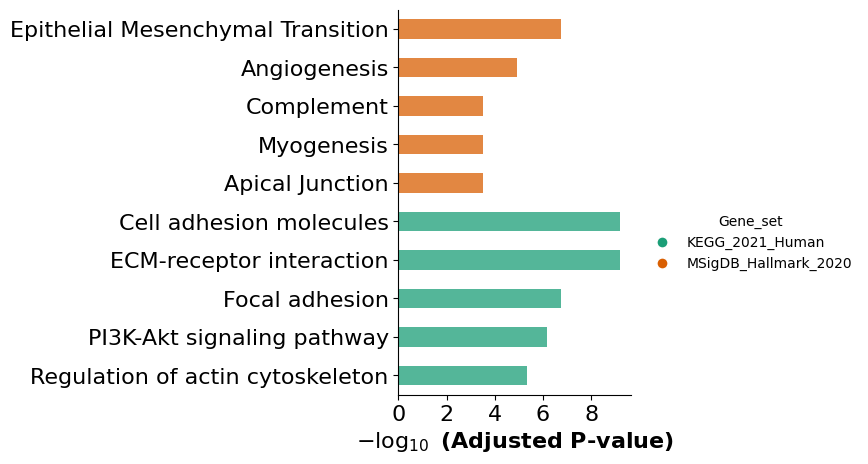

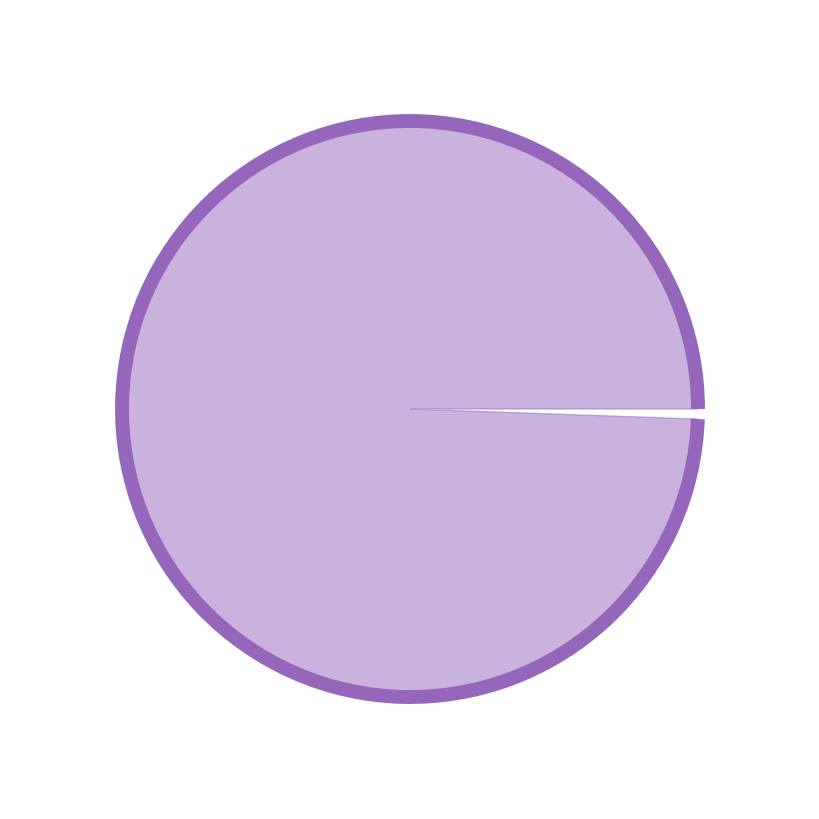


cluster10: Contains 14 LR pairs


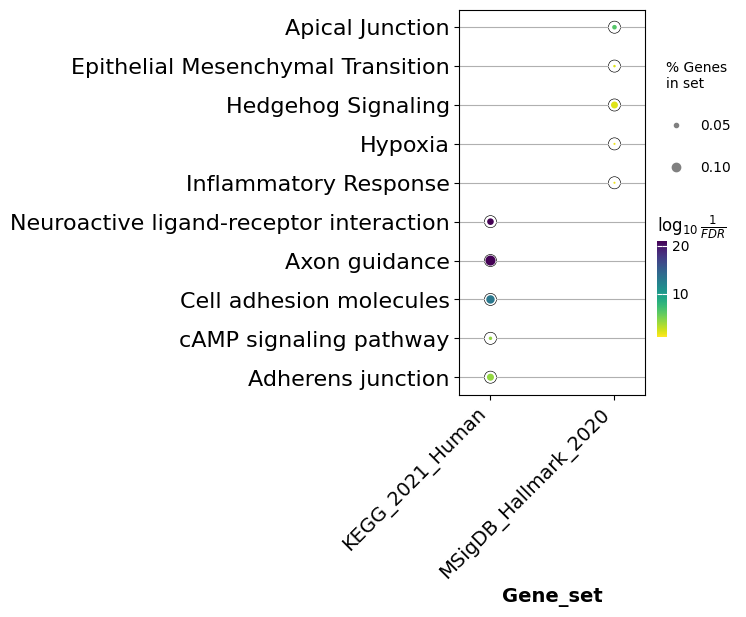

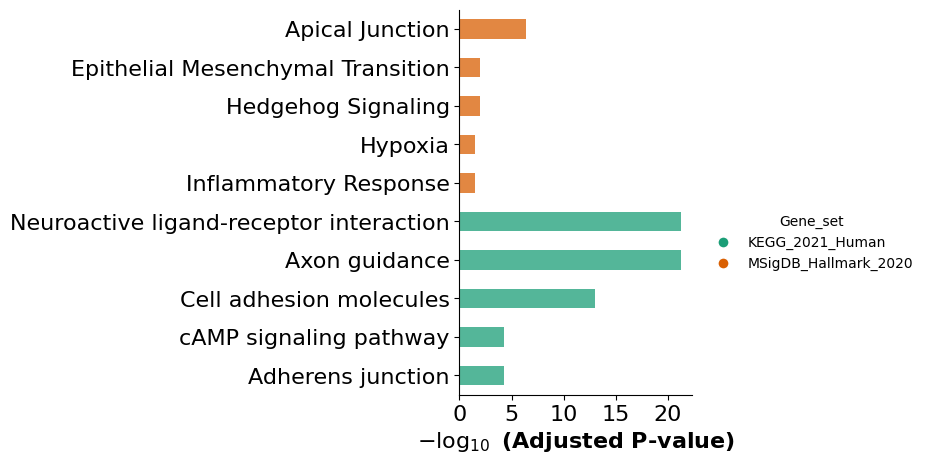

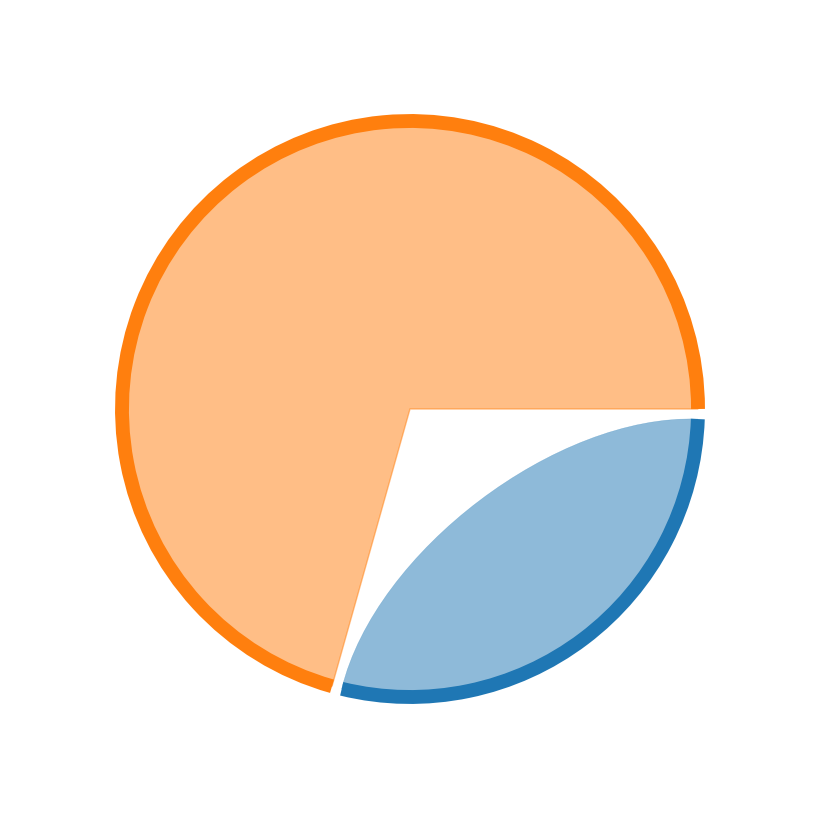


cluster11: Contains 70 LR pairs


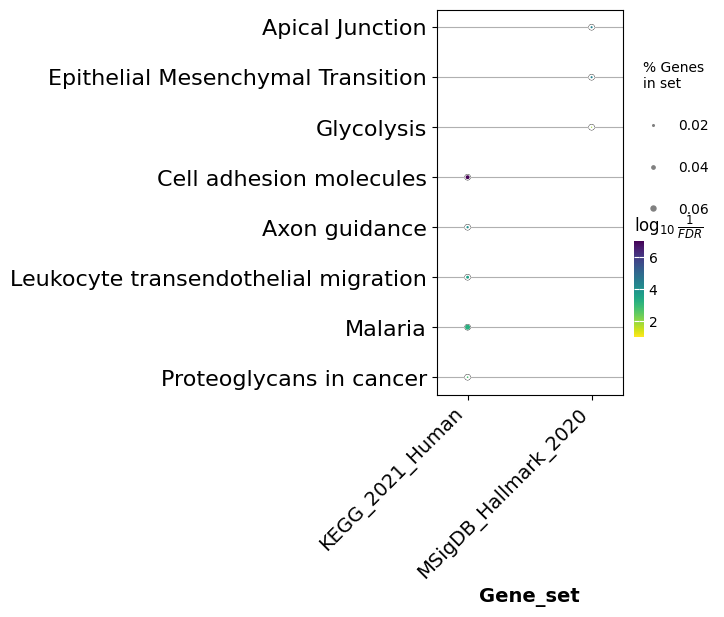

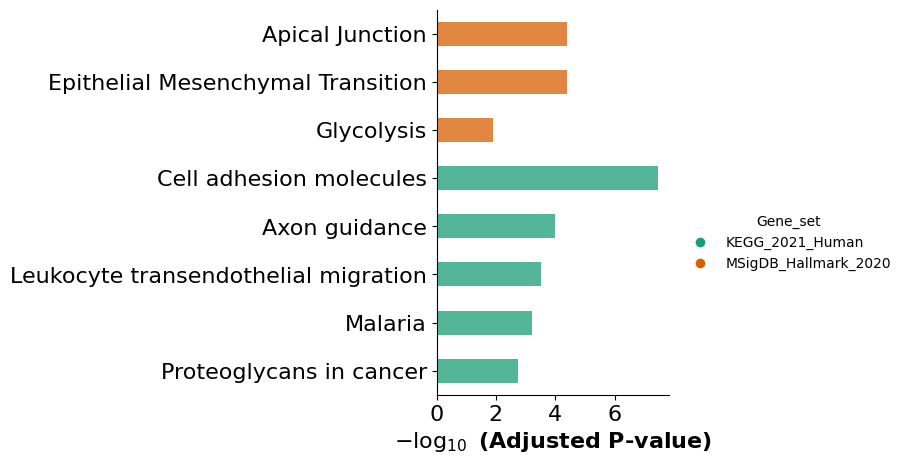

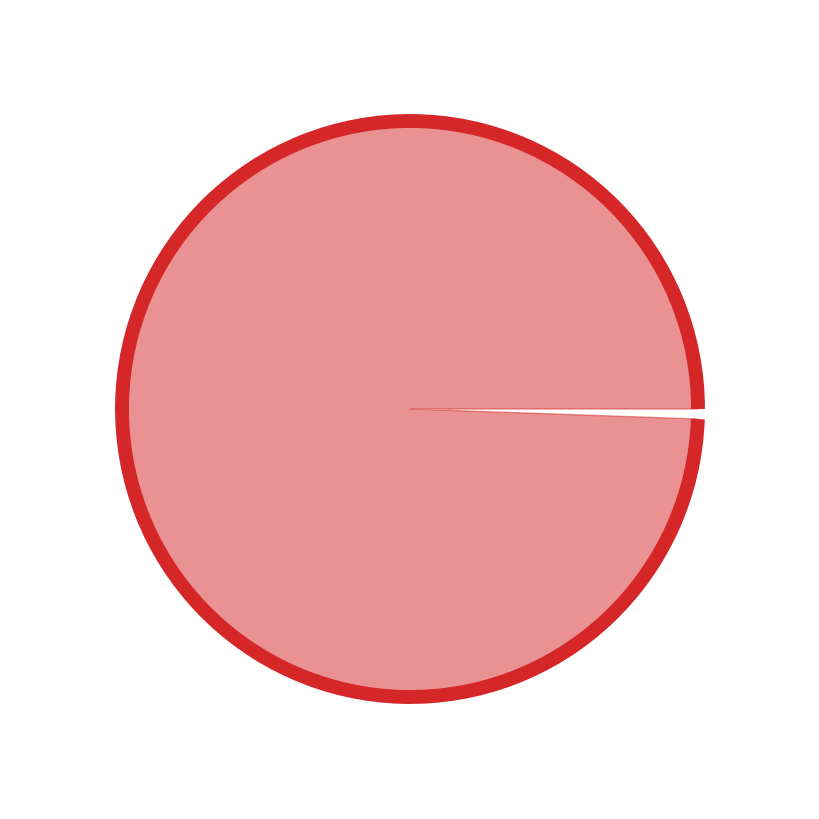

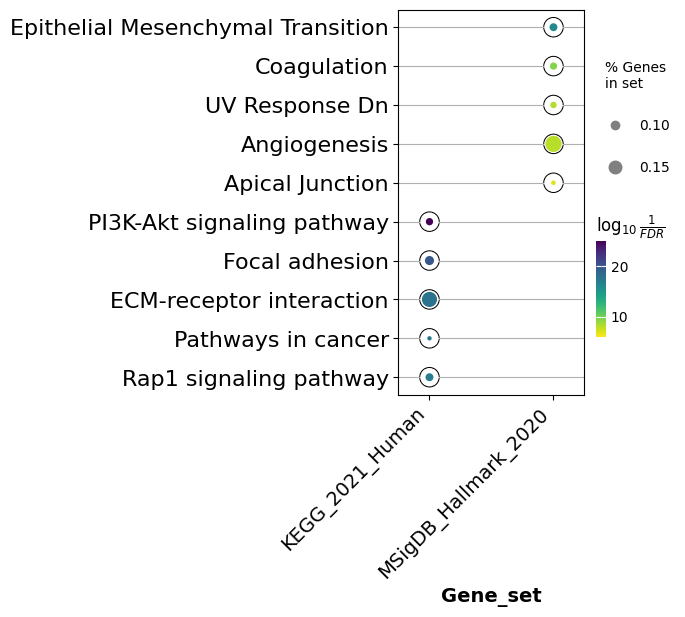

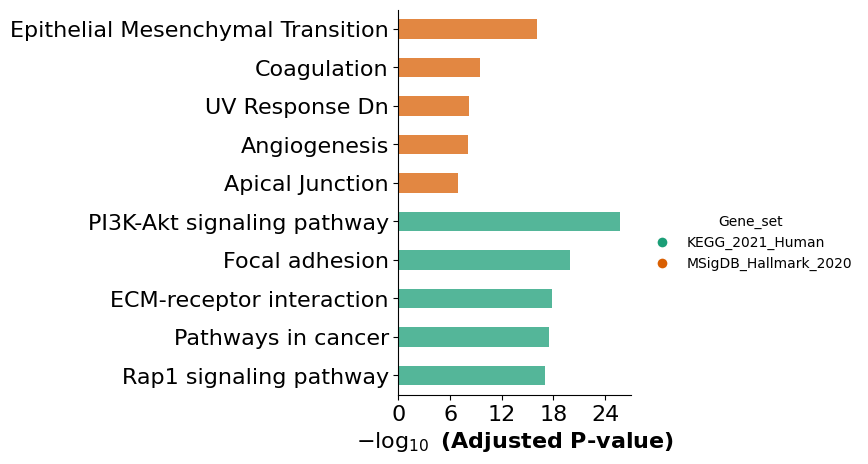

In [41]:
for cluster, matrix in aged_overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(aged_integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.chord_plot(matrix, colors=colors, label_size=0)
    mmcci.an.run_gsea(aged_integrated_clusters[cluster], organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 71/71 [00:01<00:00, 38.26it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...
Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 155/155 [00:09<00:00, 17.15it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...

cluster0: Contains 14 LR pairs


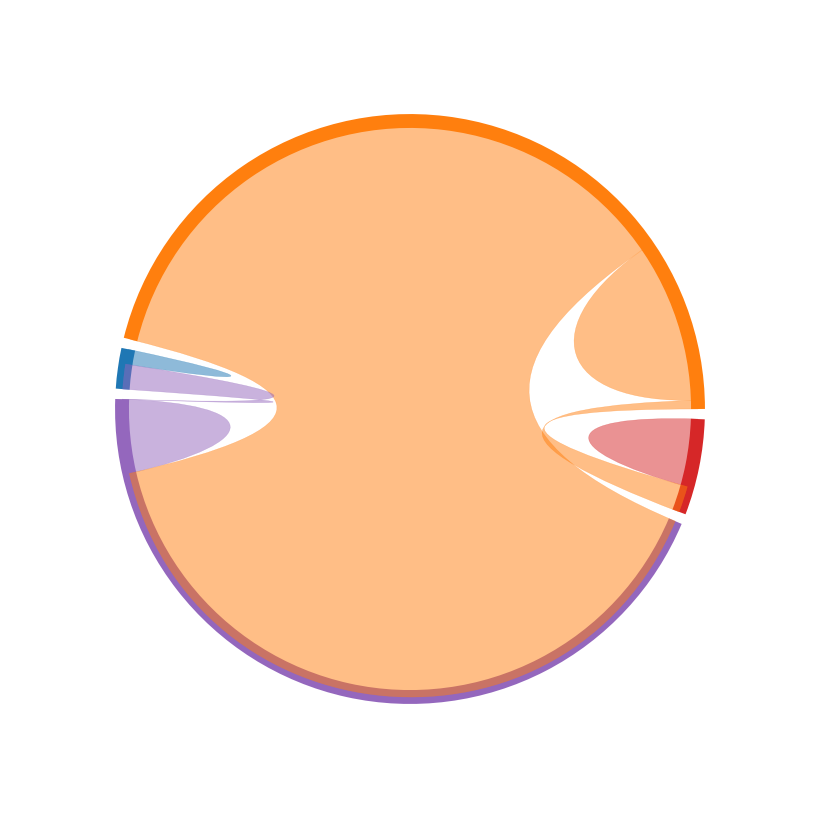


cluster1: Contains 24 LR pairs


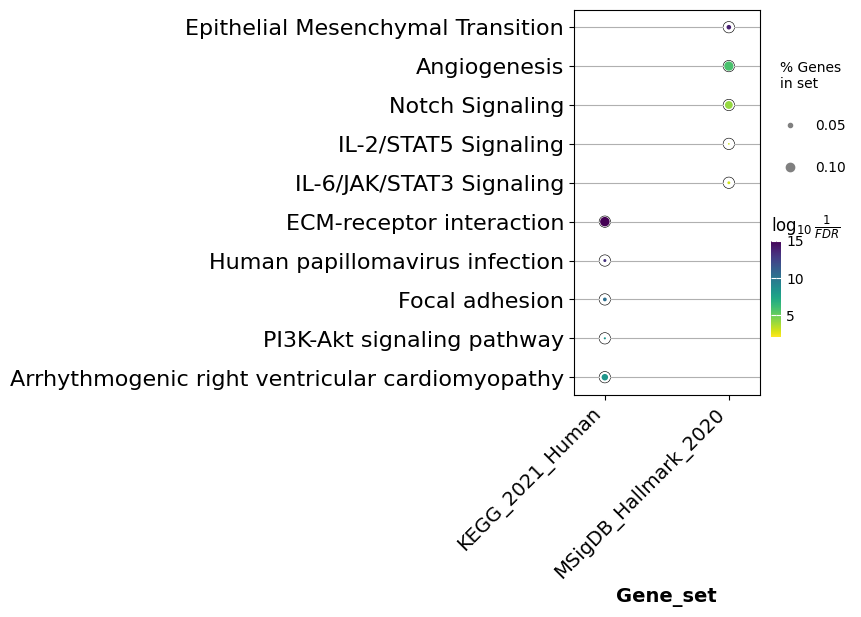

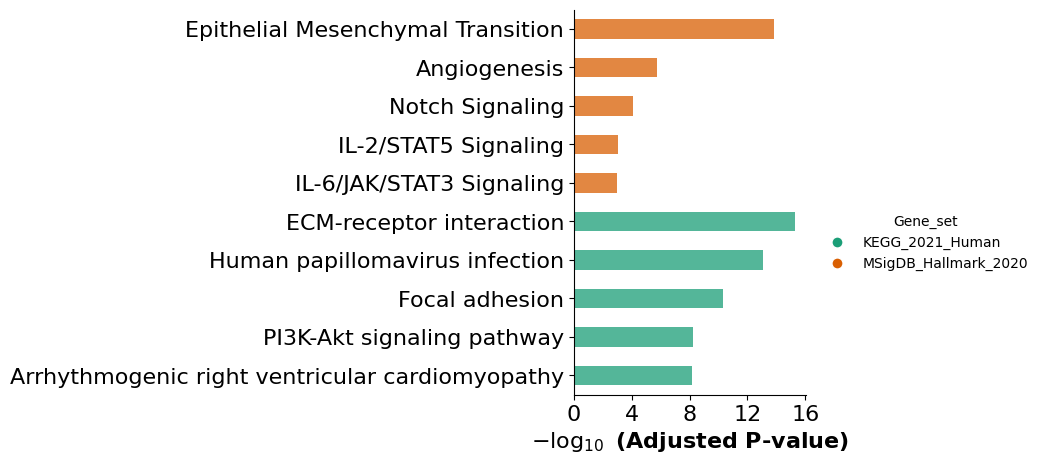

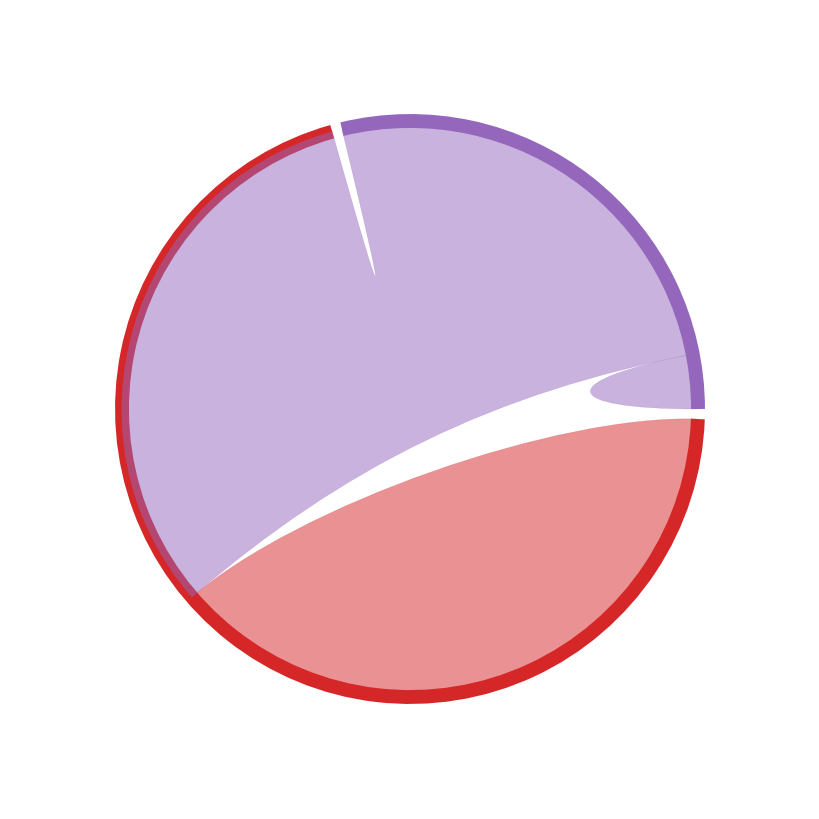


cluster2: Contains 21 LR pairs


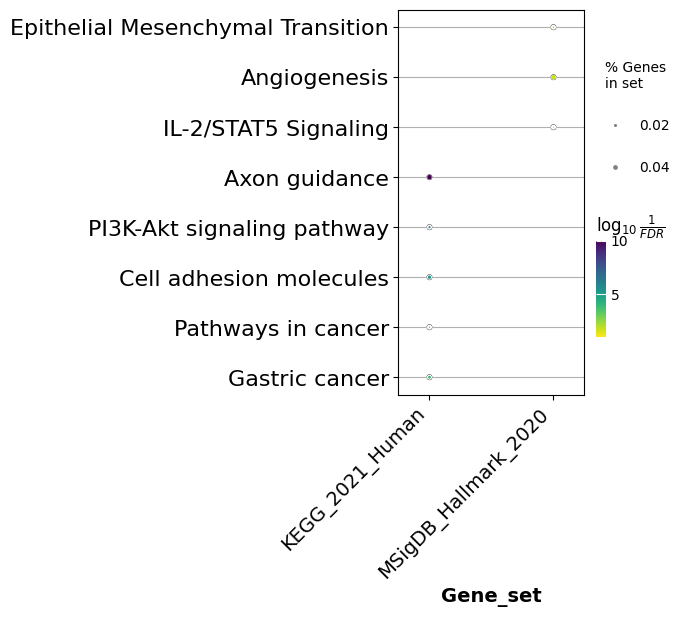

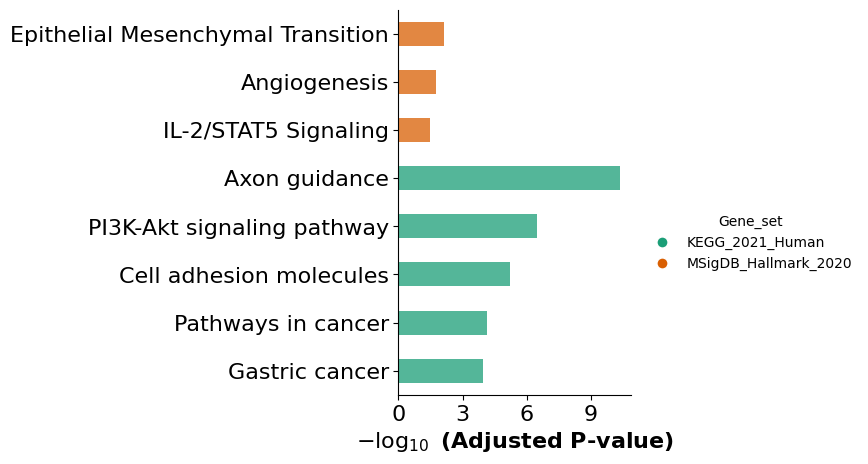

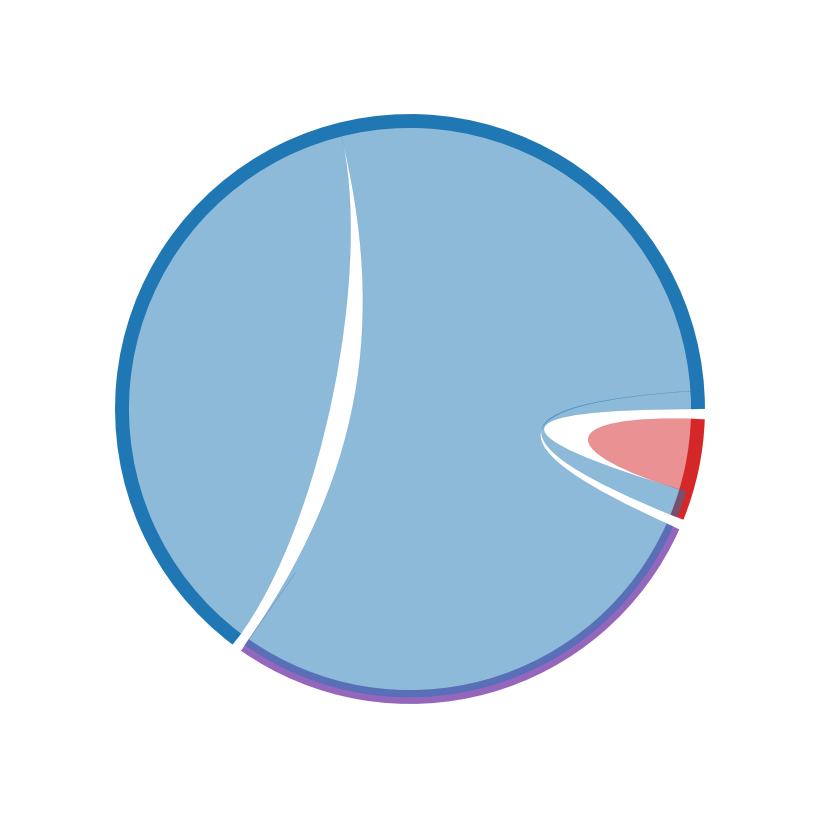


cluster3: Contains 12 LR pairs


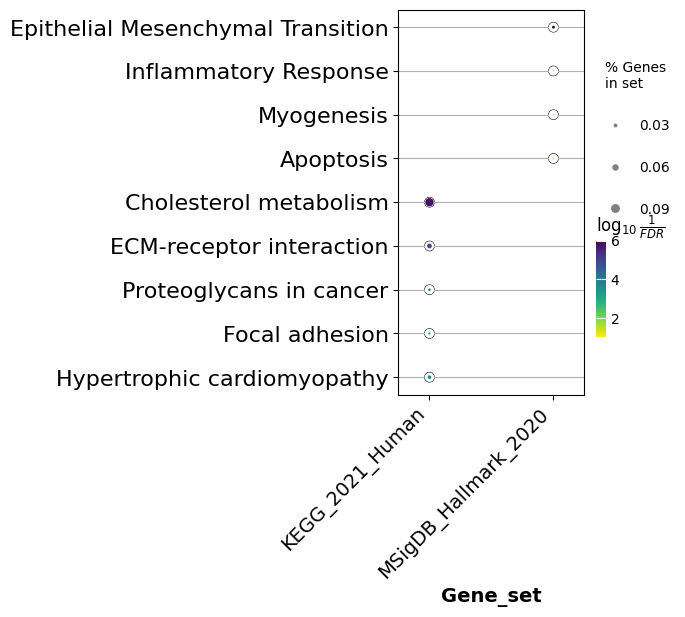

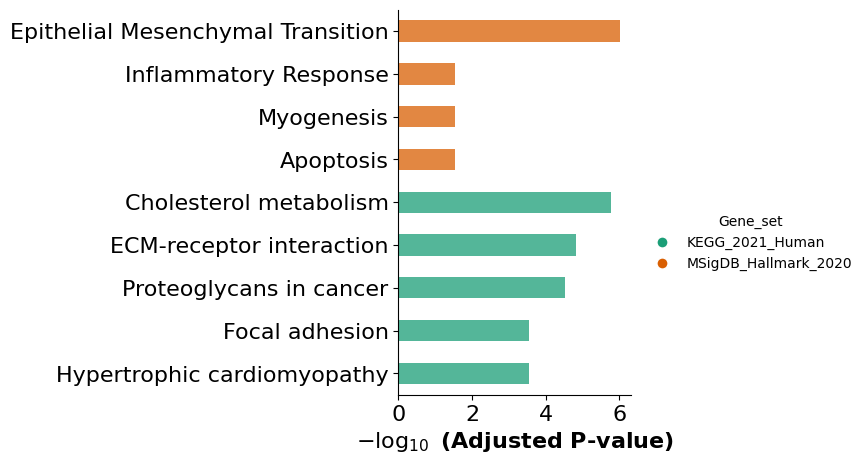

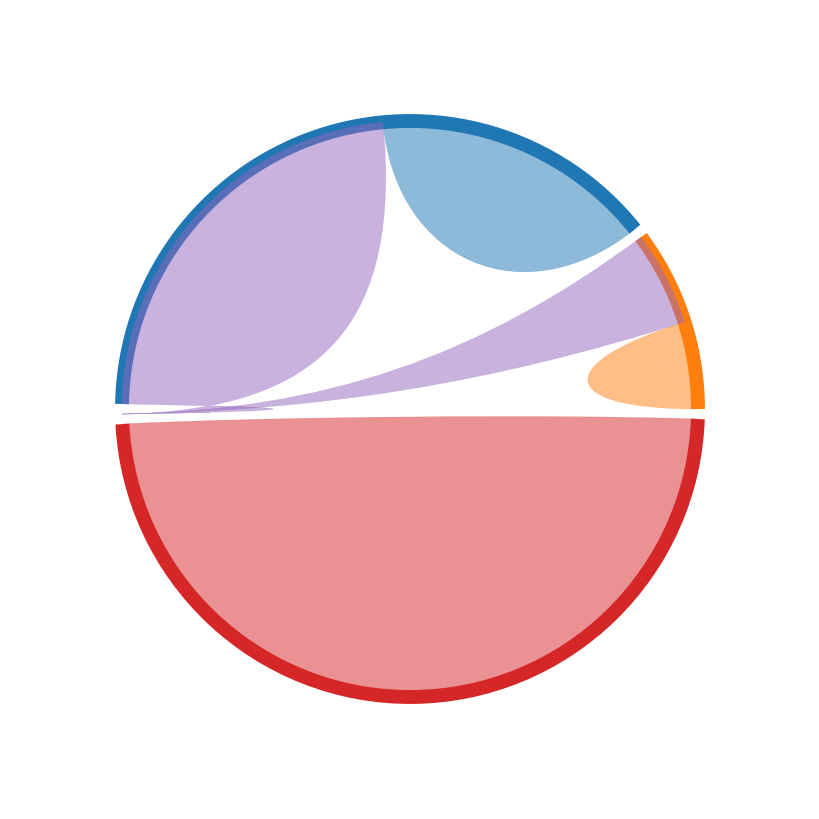


cluster4: Contains 91 LR pairs


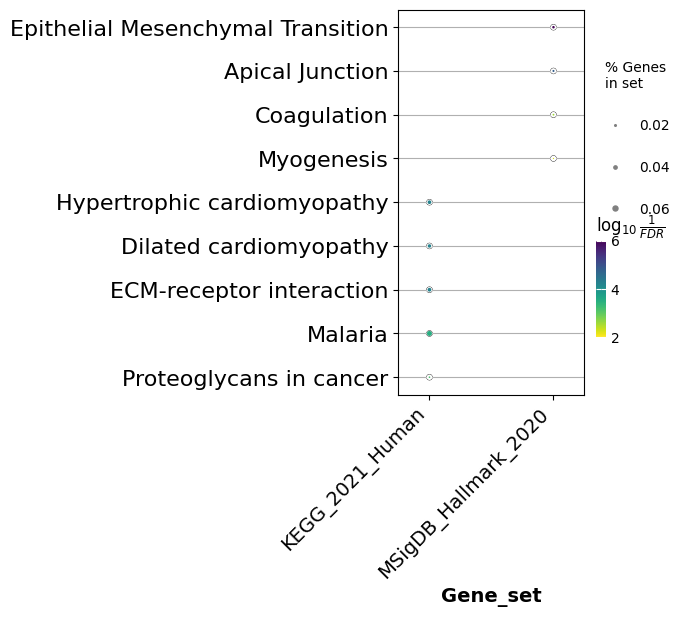

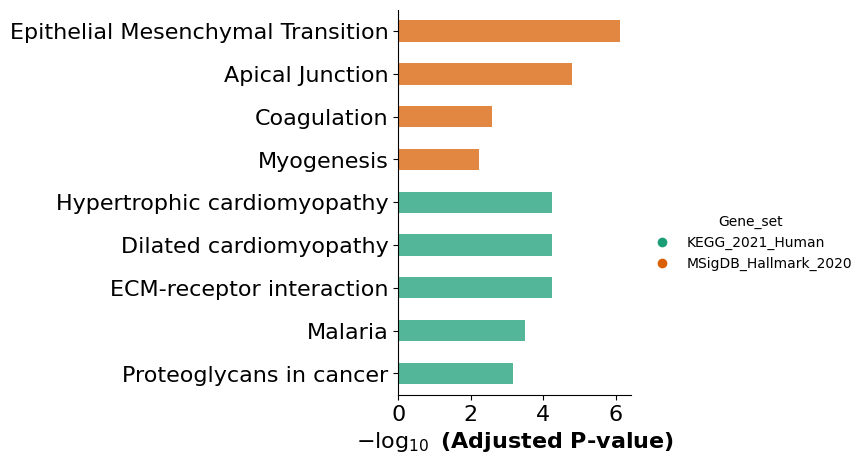

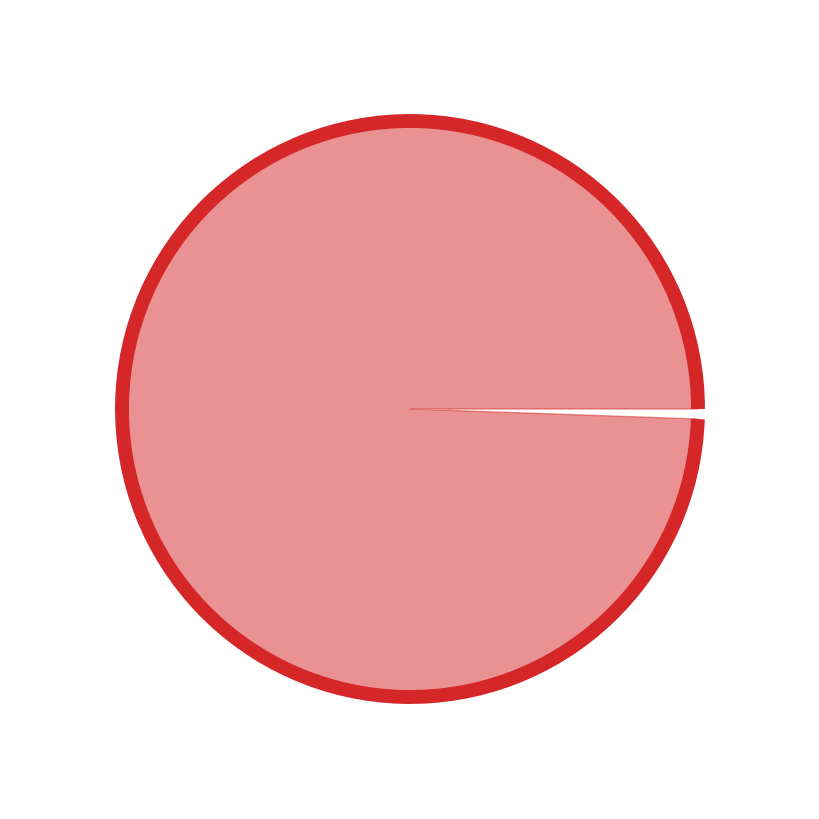


cluster5: Contains 64 LR pairs


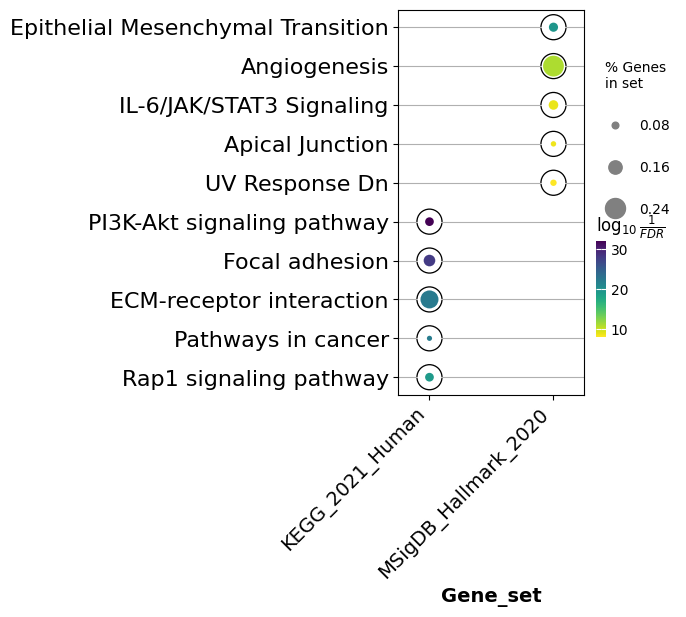

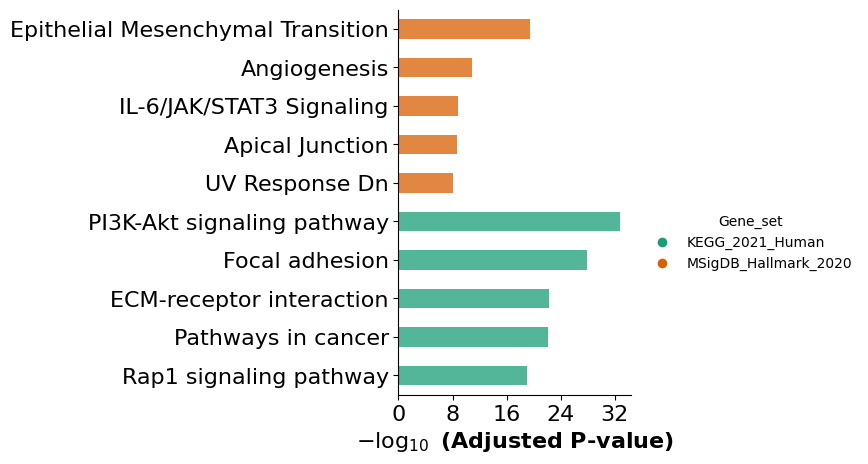

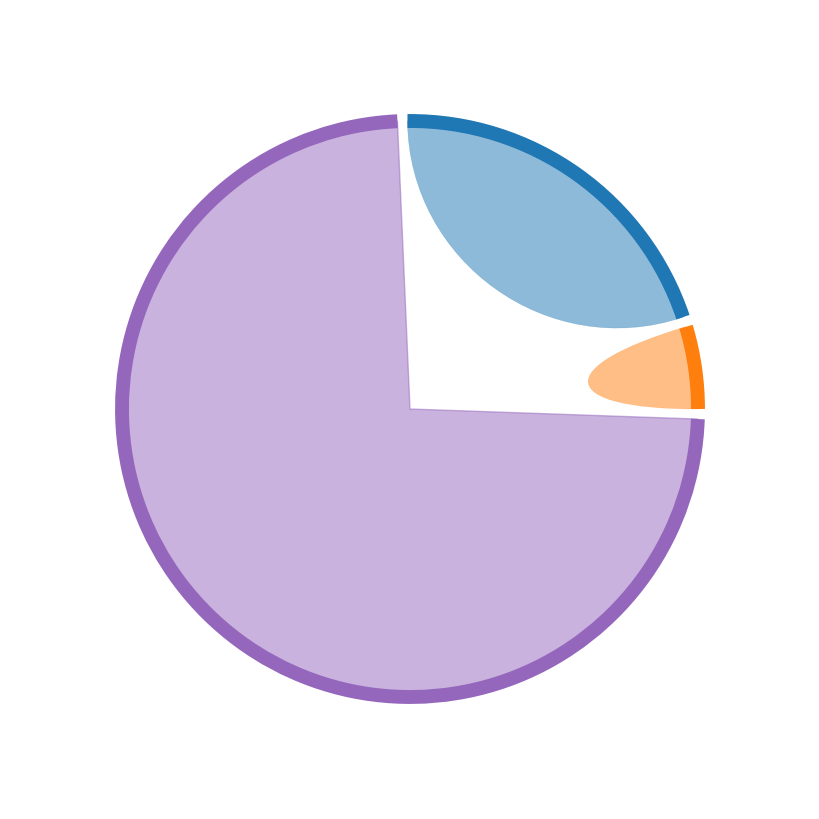

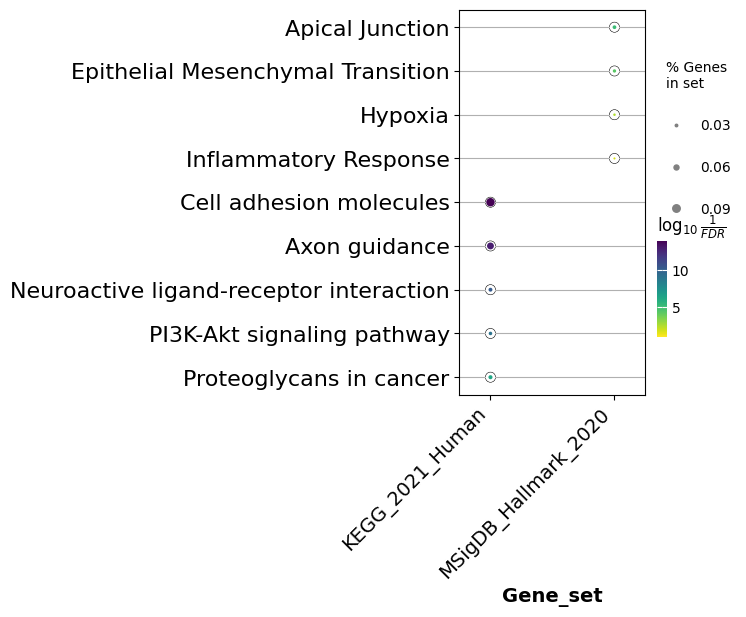

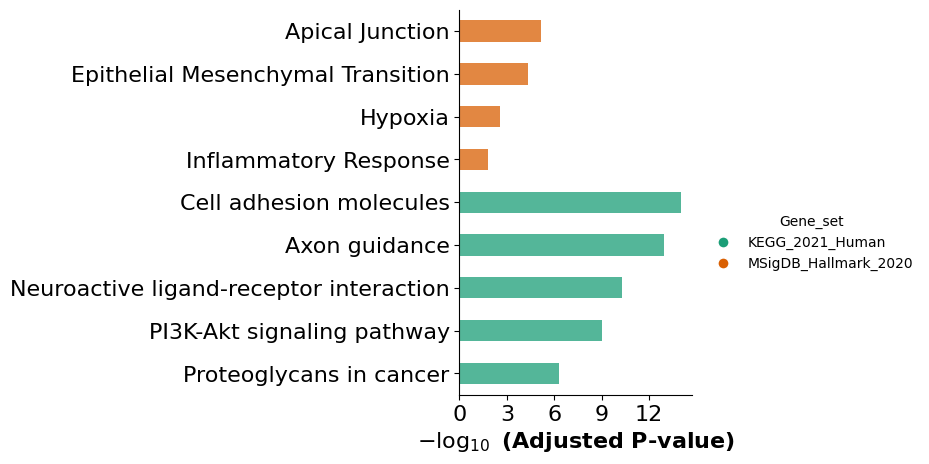

In [42]:
young_clusters = mmcci.an.lr_grouping(young_integrated_filtered, n_clusters=0)
young_integrated_clusters = mmcci.an.subset_clusters(young_integrated_filtered, young_clusters)
young_overall_clusters = mmcci.an.calculate_cluster_interactions(young_integrated_clusters)
        
for cluster, matrix in young_overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(young_integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.chord_plot(matrix, label_size=0, colors=colors)
    mmcci.an.run_gsea(young_integrated_clusters[cluster], organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])

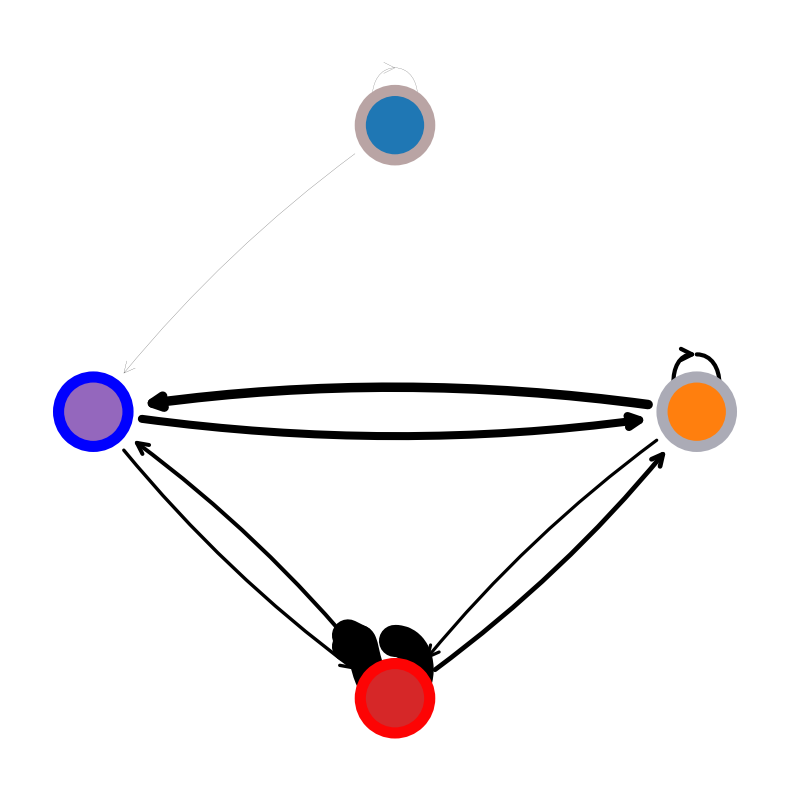

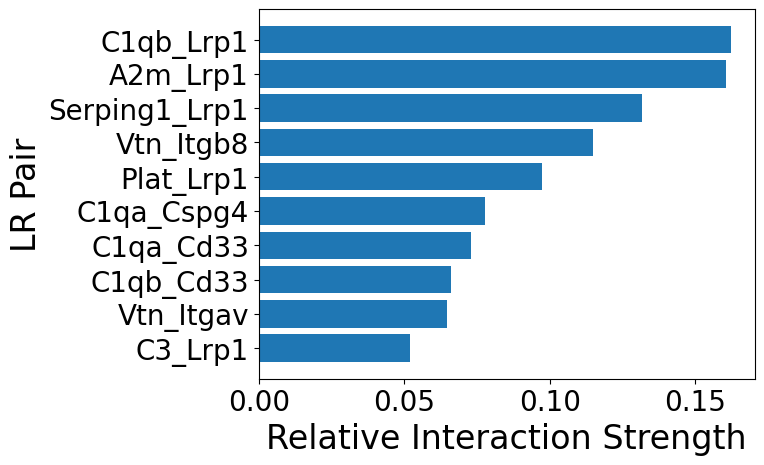

In [26]:
results = mmcci.an.run_gsea(aged_integrated, organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"], show_plots=False)
grouped = mmcci.an.pathway_subset(aged_integrated, results, ["Complement and coagulation cascades"], strict=False)
grouped_overall = mmcci.it.calculate_overall_interactions(grouped)
mmcci.plt.network_plot(grouped_overall, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
mmcci.plt.lr_barplot(grouped, n=10)

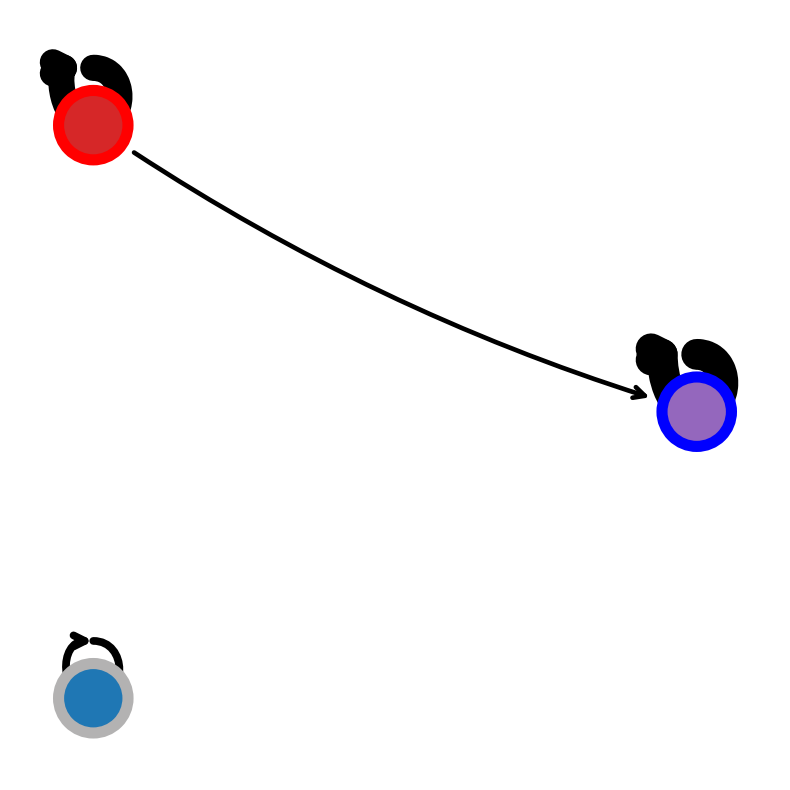

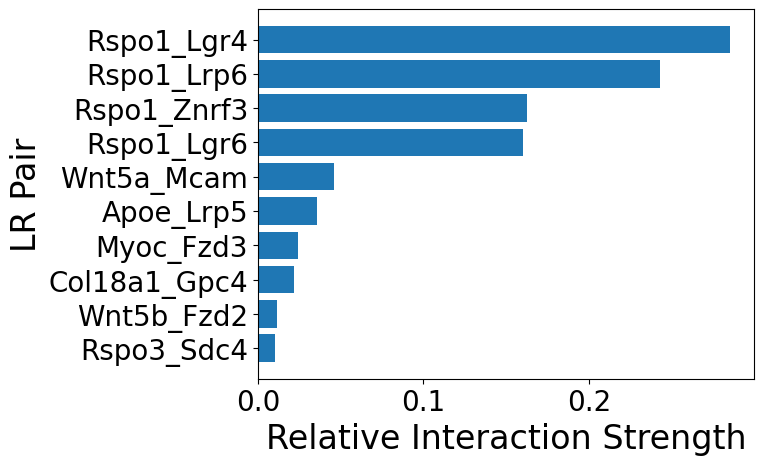

In [27]:
results = mmcci.an.run_gsea(young_integrated, organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"], show_plots=False)
grouped = mmcci.an.pathway_subset(young_integrated, results, ["Wnt signaling pathway"], strict=False)
grouped_overall = mmcci.it.calculate_overall_interactions(grouped)
grouped_overall = grouped_overall.loc[["Neurons", "Oligos", "Ependymal"],["Neurons", "Oligos", "Ependymal"]]
mmcci.plt.network_plot(grouped_overall, node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)
mmcci.plt.lr_barplot(grouped, n=10)